**ML-2 Project - Dataset 2 - Bank Term Deposit Marketing (Classification)**

Comparison between state of the art ML algorithms (Random Forest, XGBoost, SVM, Logistic Regression for classification and Multiple Linear Regression, SVM Regression, and Random Forest Regression for regression) and MCMC Methods. 

- **Call Center Data:**
https://www.kaggle.com/satvicoder/call-center-data?select=Call+Center+Data.csv

- **Inventory Demand:**
https://www.kaggle.com/flenderson/sales-analysis

- **Sales Forecasting (through Regression):**
https://www.kaggle.com/aungpyaeap/supermarket-sales

- **Telecom Churn:**
https://www.kaggle.com/jpacse/datasets-for-churn-telecom
    * LoS prediction on Tabba dataset (Nafeesa, extension of ML-1 project)

- **Credit Card Fraud:**
https://www.kaggle.com/mlg-ulb/creditcardfraud

- **Marketing Campaign:**
https://www.kaggle.com/rodsaldanha/arketing-campaign




All analyses to be performed in the notebook (no need to write a report). For your analyses, use Markdown cells
- Select any one of the above datasets
- Clean the dataset if needed
- Perform EDA thoroughly (as taught in ML-1) and write down analyses
- Determine the column to be predicted and the predictors
- Do some research to determine the prior and the likelihood functions along with proper justifications.
- Perform ML on your dataset using the set of classification/regression algorithms as outlined above
- Perform MCMC and compare the predictive results thoroughly with ML results



**Bonus marks to be given for following a cleaning/EDA template, ML template and MCMC template (Note: you can merge all three above into one single template)**

**Bonus marks to be given for using multiple performance measures with predictive results demonstrated thoroughly through all relevant graphs and tables**

*Basically, marks will be given on how well you are able to design the MCMC problem so that the results are at par or better than ML results (in fact, this is the whole project). You will need to do much research on designing the likelihood and the priors and also on the selection of the predictors. Remember that MCMC methods are slower than ML algorithms but they might be more effective in the long run.  Also tune for hyperparameters for both ML and MCMC methods.* 


**Deadline: 31st December, 2021**


**Required:**

- Notebook (all analyses within)

- A 2-3 minute video of your project - basically  a notebook demo

**Some more datasets to try:**

- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

- https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- https://archive.ics.uci.edu/ml/datasets/Cargo+2000+Freight+Tracking+and+Tracing

- https://archive.ics.uci.edu/ml/datasets/Educational+Process+Mining+%28EPM%29%3A+A+Learning+Analytics+Data+Set



In [1]:
#Importing required packages

try:
    from xgboost import XGBClassifier
except:
    print("Failed to import xgboost, make sure you have xgboost installed")
    print("Use following command to install it: pip install xgboost")
    XGBClassifier = None

try:
    import lightgbm as lgb
except:
    print("Failed to import lightgbm, make sure that you have lightgbm installed")
    print("Use following command to install it: conda install -c conda-forge lightgbm")
    lgb = None
    
#importing multiprocessing to keep up with the compute power needed
import multiprocessing


#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import math
import warnings
import matplotlib.pyplot as plt        
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn import preprocessing

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score

#import regularization libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

# import scaling
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
sb.set(color_codes=True, font_scale=1.2)

#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
import datetime
import string
from sklearn.impute import KNNImputer
%matplotlib inline
import tkinter as tk
from tkinter import filedialog
import pylab 
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sb

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")
sb.set(color_codes=True, font_scale=1.2)

from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#importing class balancing libraries
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

**Importing Templates (Wherever possible, functions taken from the templates will be defined within this notebook so the templates don't have to be referred to again and again)**

In [2]:
#Importing my personal data wrangling and MVA template developed in ML 1 class
from Yawar_Wrangling_Template import yawar_wrangling_KNN as wrn

# Importing my personal ML Algorithms template developed in ML 1 class
import Yawar_MLTemplate as ml

#Importing clustering playground

import ClusterPlayground_Yawar as clust

### Load and Summarise Dataset at hand

**Bank Marketing Dataset (Predicting Term Deposit Suscriptions)**

Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

In [4]:
# Defining function | Also present in our template
def read_csv(filename):
    try:
        df= pd.read_csv(filename, skipinitialspace=True)
    except:
        df= pd.read_csv(filename, skipinitialspace=True)
        
    return df


#loading df

FILE_NAME = 'bank.csv'
LABEL_COL = "deposit"

df = read_csv(FILE_NAME)

print('\nDATA PREVIEW:')
display(df.head())
print('\nDATA SHAPE:')
print(df.shape)
print('\nCOLUMN DATA TYPES:')
print(df.dtypes)


DATA PREVIEW:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



DATA SHAPE:
(11162, 17)

COLUMN DATA TYPES:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


**This dataset has 17 features/columns for 11162 customers**

In [4]:
df.describe(
    include='all'
)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


no     5873
yes    5289
Name: deposit, dtype: int64


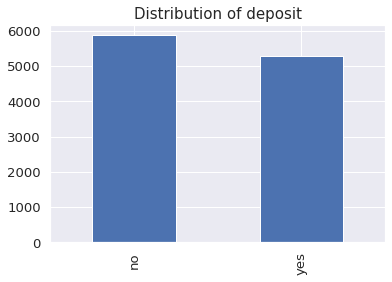

In [5]:
# Plotting barchart of class column

def barchart(df,col):
        df[col].value_counts().plot(kind='bar')
        print(df[col].value_counts())
        plt.title('Distribution of %s'%col, fontsize=15)
        
barchart(df, LABEL_COL)

**As we can see the customer subsciption is low as compared to those who have subscribed**

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64


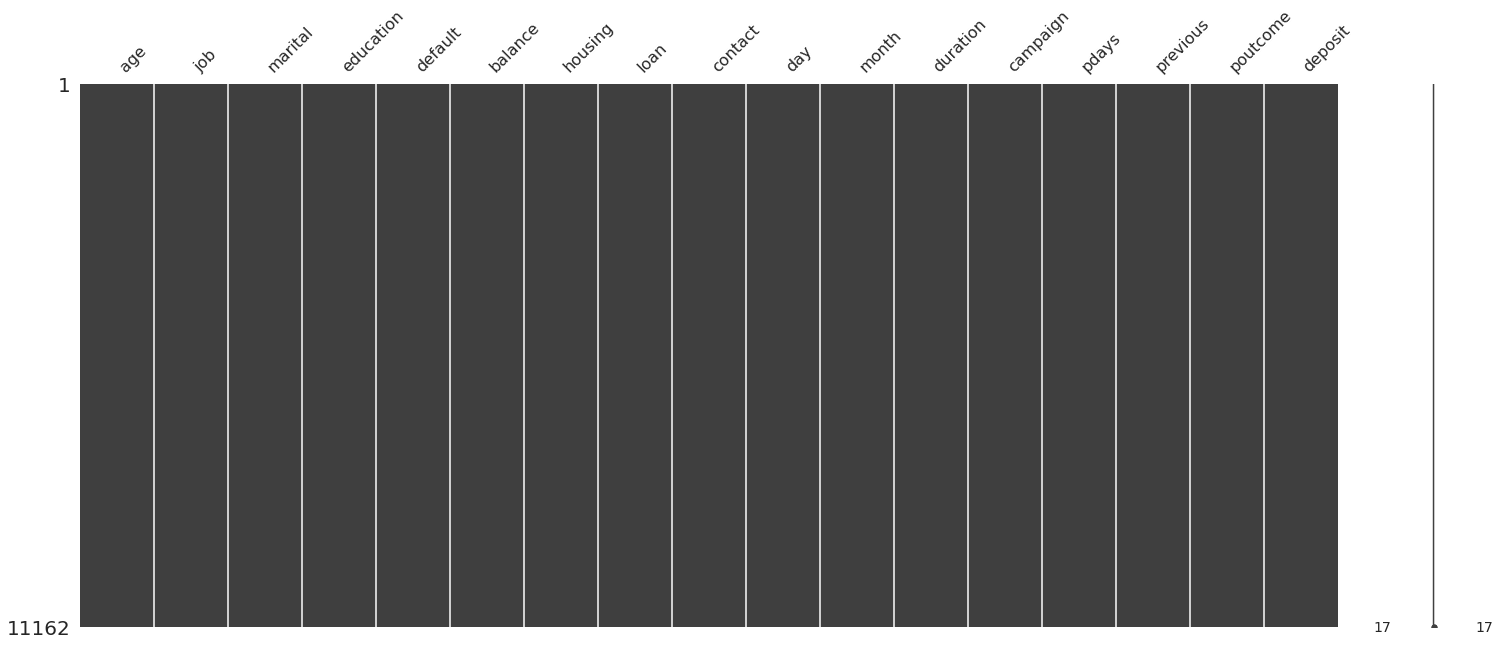

In [6]:
#Defining functionsto check MV
def check_mv(df):
        print(df.isnull().sum().sort_values(ascending=False))
        mano.matrix(df)


#checking Missing values

check_mv(
    df
)

#mano.matrix(df)

**No MVs**

### Data Preprocessing

In [7]:
categorical_features = df.select_dtypes(include=[np.object])

numeric_features = df.select_dtypes(include=[np.number])

cols = numeric_features.columns
numeric_features.loc[:, cols] = preprocessing.scale(numeric_features.loc[:, cols])

le = preprocessing.LabelEncoder()

categorical_features = df[categorical_features.columns].apply(lambda x: le.fit_transform(x))

df = pd.concat([categorical_features, numeric_features], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        11162 non-null  int64  
 1   marital    11162 non-null  int64  
 2   education  11162 non-null  int64  
 3   default    11162 non-null  int64  
 4   housing    11162 non-null  int64  
 5   loan       11162 non-null  int64  
 6   contact    11162 non-null  int64  
 7   month      11162 non-null  int64  
 8   poutcome   11162 non-null  int64  
 9   deposit    11162 non-null  int64  
 10  age        11162 non-null  float64
 11  balance    11162 non-null  float64
 12  day        11162 non-null  float64
 13  duration   11162 non-null  float64
 14  campaign   11162 non-null  float64
 15  pdays      11162 non-null  float64
 16  previous   11162 non-null  float64
dtypes: float64(7), int64(10)
memory usage: 1.4 MB


In [8]:
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,age,balance,day,duration,campaign,pdays,previous
0,0,1,1,0,1,0,2,8,3,1,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326
1,0,1,1,0,0,0,2,8,3,1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326
2,9,1,1,0,1,0,2,8,3,1,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326
3,7,1,1,0,1,0,2,8,3,1,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326
4,0,1,2,0,0,0,2,8,3,1,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326


### Exploratory Data Analysis and Visualization

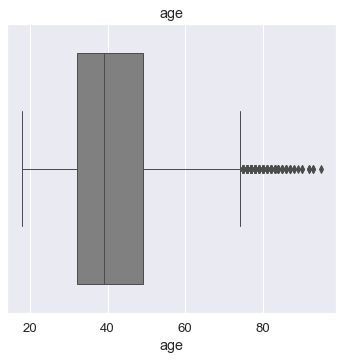

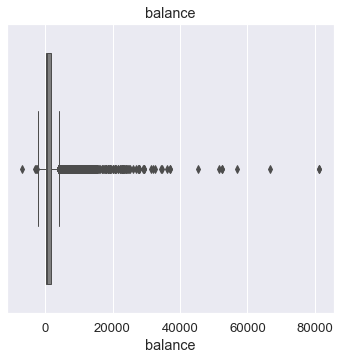

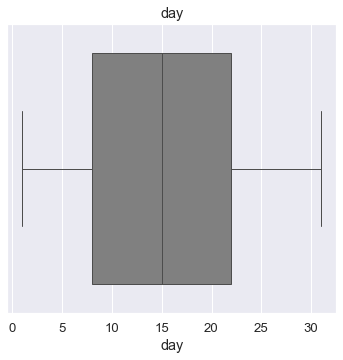

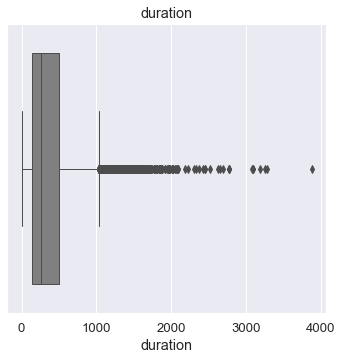

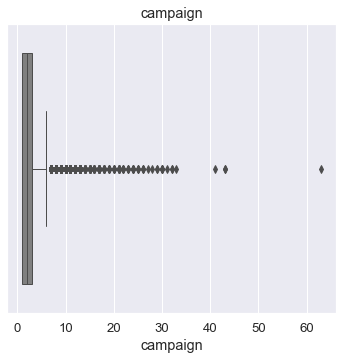

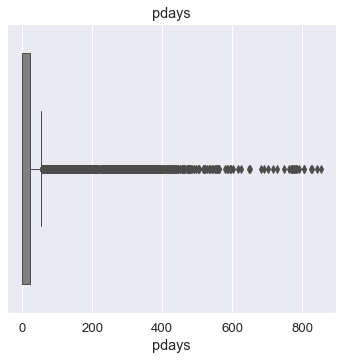

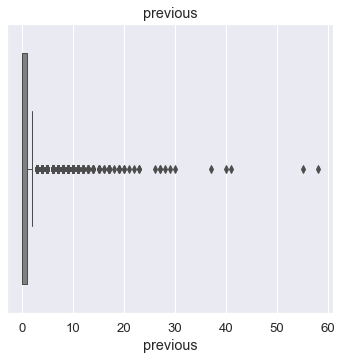

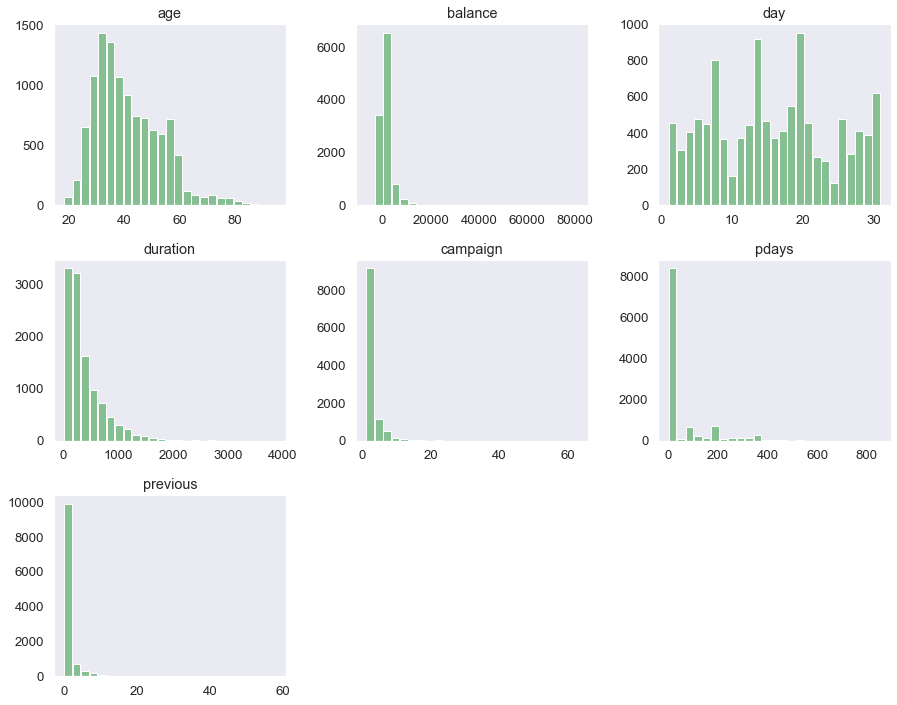

In [5]:
ml.numcolanalysis(df)

**Most of the features seem to be skewed**

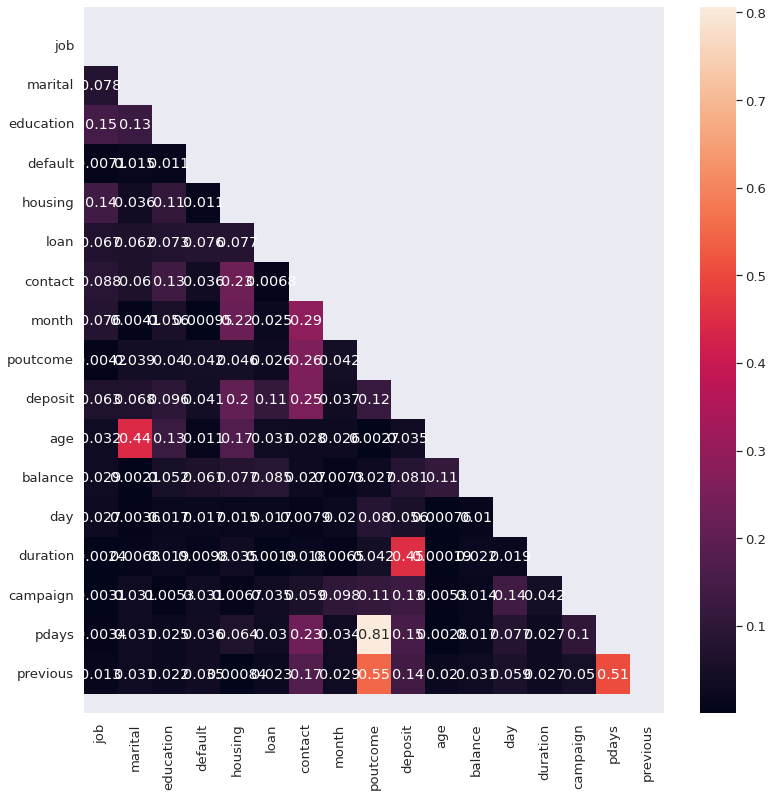

In [10]:
import seaborn as sns
from IPython.display import HTML

plt.figure(figsize=(13, 13))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

**Most features are not correlated closely thus DR should not be done as that would result in discarding useful information required for predictions**

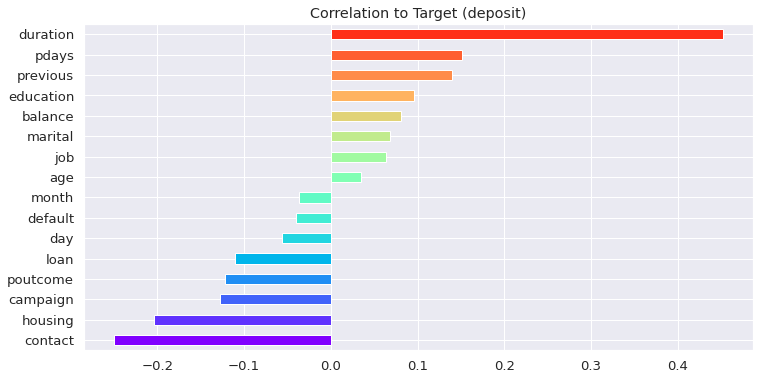


 duration     0.451919
pdays        0.151593
previous     0.139867
education    0.095948
balance      0.081129
marital      0.067610
job          0.063395
age          0.034901
month       -0.037121
default     -0.040680
day         -0.056326
loan        -0.110580
poutcome    -0.122369
campaign    -0.128081
housing     -0.203888
contact     -0.249847
dtype: float64


In [11]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n_fts = len(df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

df.drop('deposit',axis=1).corrwith(df.deposit).sort_values(ascending=True).plot(kind='barh', 
                                                                                     color=colors, figsize=(12, 6))
plt.title('Correlation to Target (deposit)')
plt.show()

print('\n',df.drop('deposit',axis=1).corrwith(df.deposit).sort_values(ascending=False))

In [12]:
df['housing'] = -df['housing']
df['contact'] = -df['contact']
df['campaign'] = -df['campaign']
df['poutcome'] = -df['poutcome']
df['loan'] = -df['loan']

corr = df.corr() 

cor_target = corr["deposit"]

relevant_features = cor_target[cor_target > 0.08]
relevant_features.sort_values(ascending=False)

deposit      1.000000
duration     0.451919
contact      0.249847
housing      0.203888
pdays        0.151593
previous     0.139867
campaign     0.128081
poutcome     0.122369
loan         0.110580
education    0.095948
balance      0.081129
Name: deposit, dtype: float64

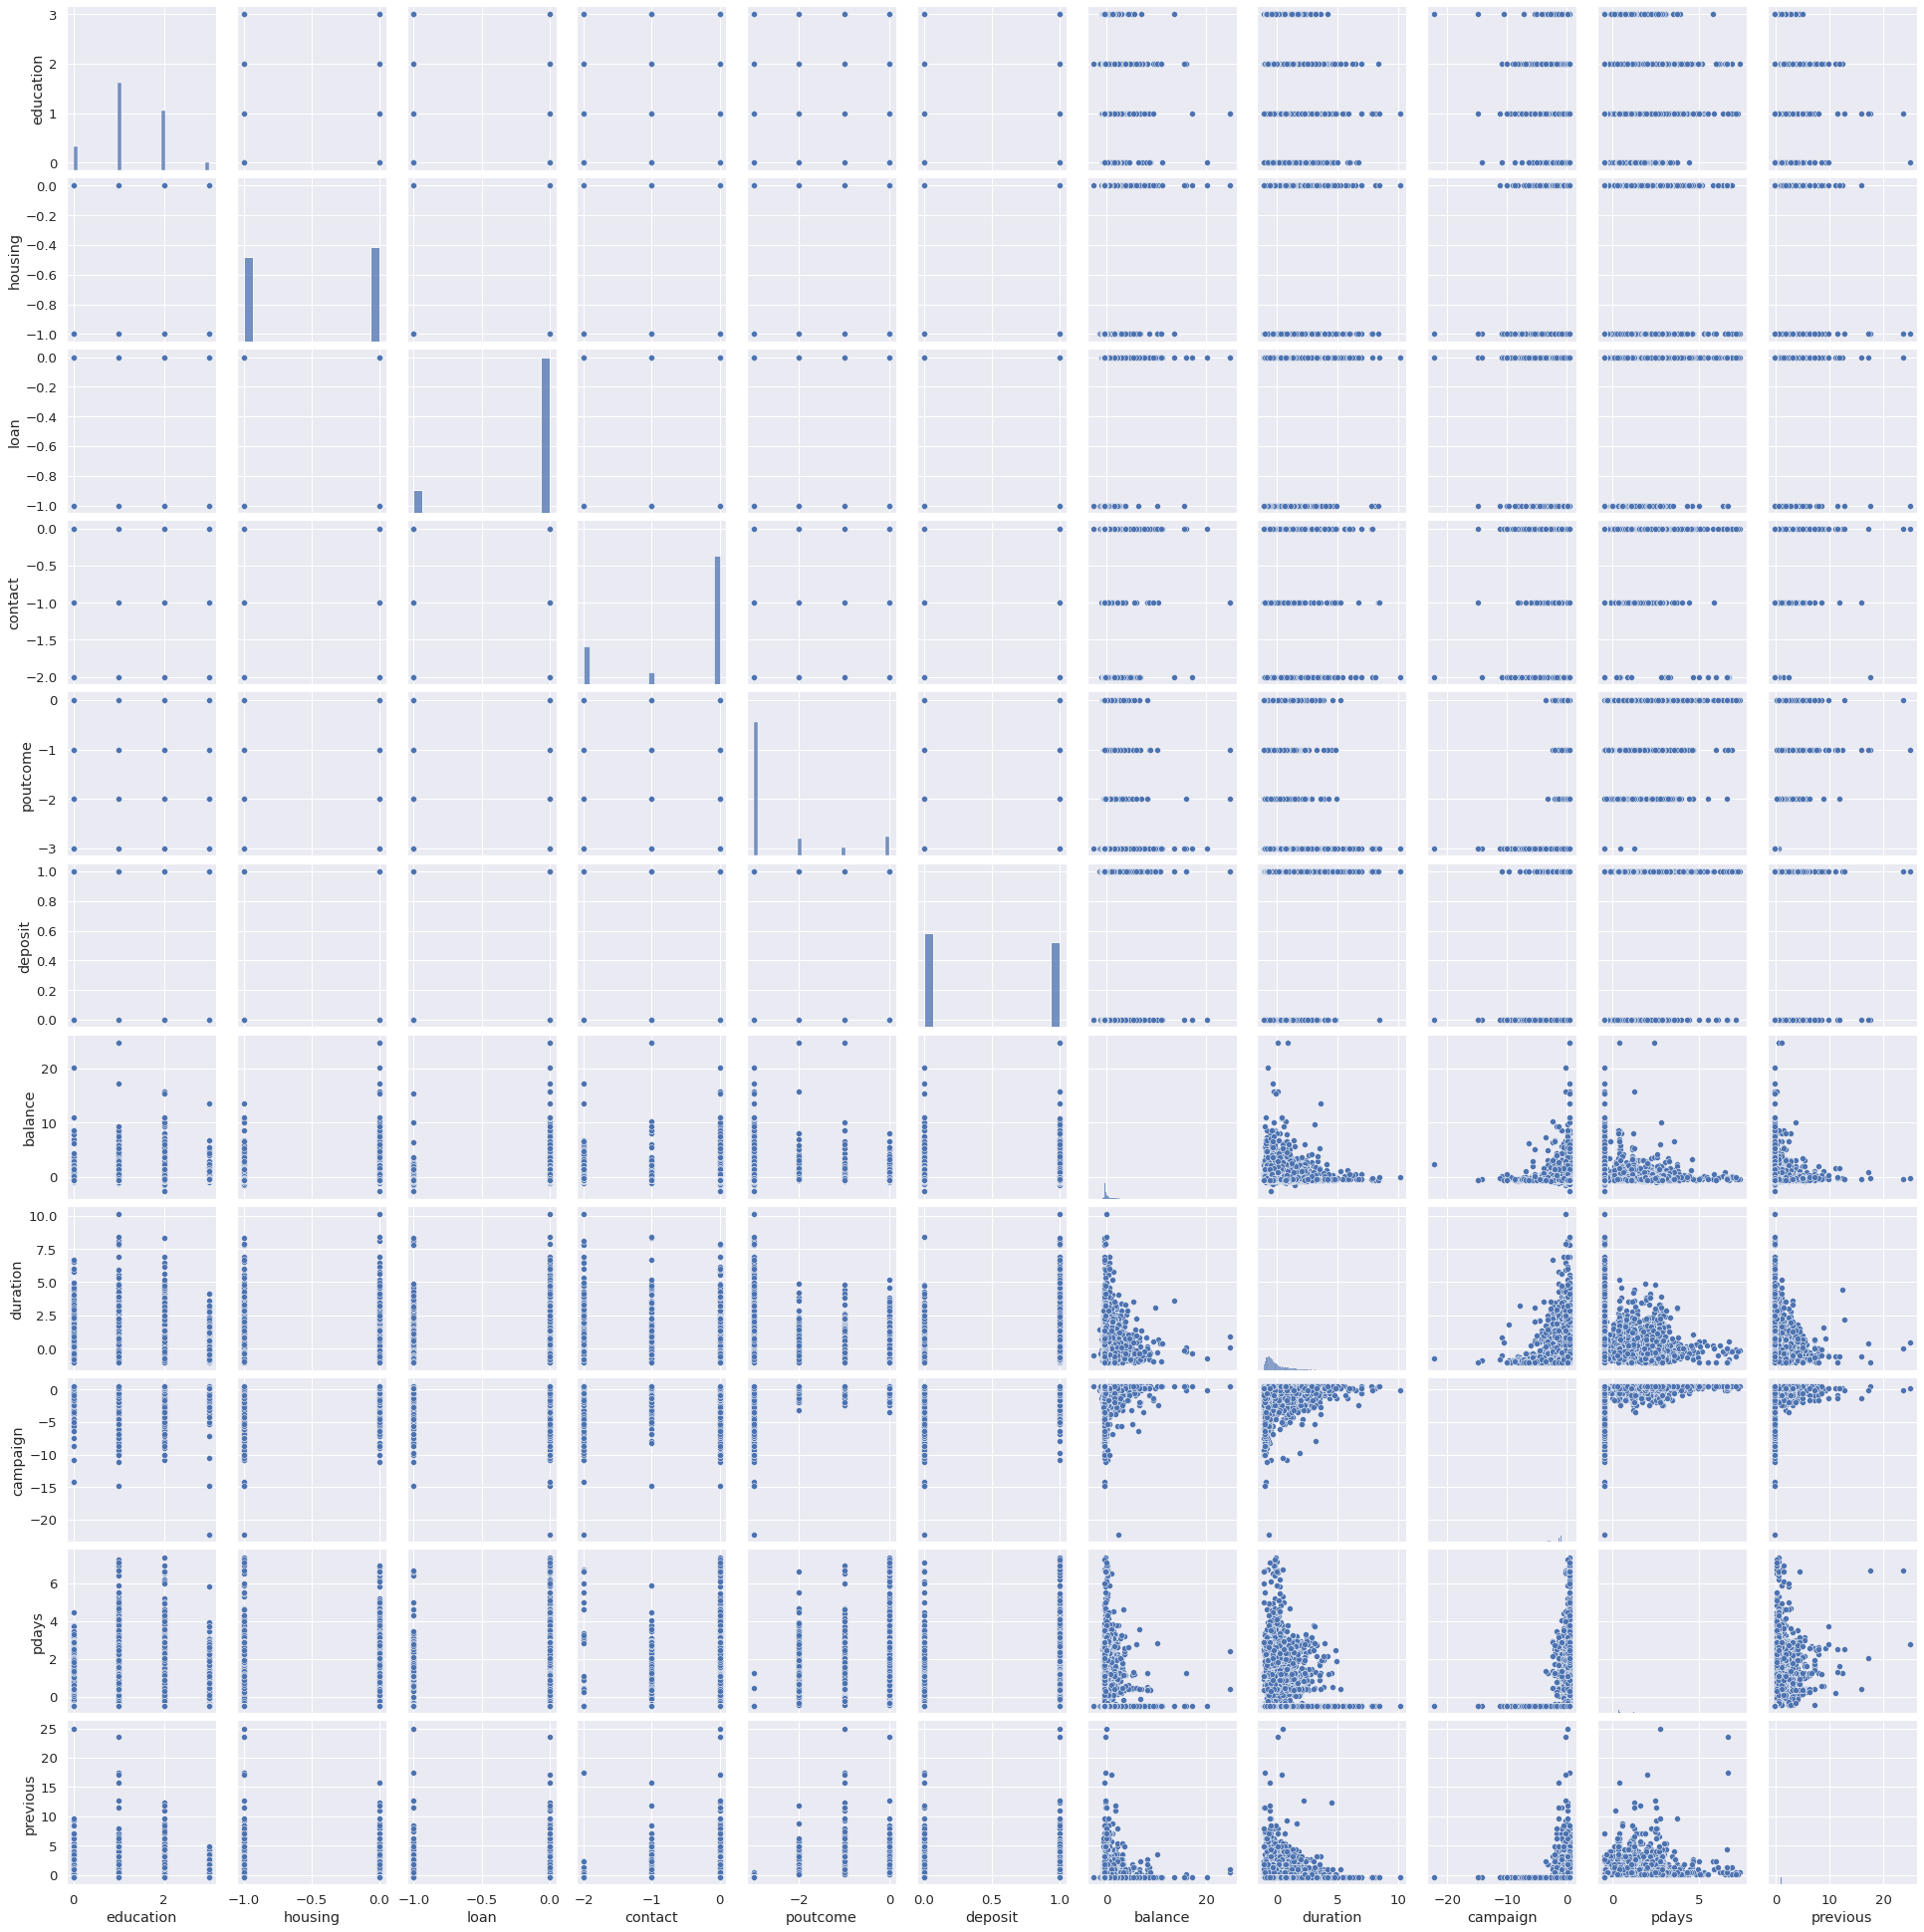

In [13]:
sns.pairplot(df[relevant_features.index]);

# Part 1 - Applying Classification ML Algorithms

**We try multiple ways to optimise accuracy with ML algorithms**

* a) Without Feature Selection, Cross Validation
* b) With Feature Selection (using RFFS)
* c) With Feature Selection and Cross Validation (using RFFS)
* d) With only Cross Validation

**Metrics are shown below in the code, we also draw a table of observations in the end for comparison**

**Splitting into train test 80/20**

In [14]:
#helper function which only splits into X and y
def XYsplit(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    return X,y

X,y = XYsplit(df, LABEL_COL)

In [15]:
X

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
0,0,1,1,0,-1,0,-2,8,-3,1.491505,0.252525,-1.265746,1.930226,0.554168,-0.481184,-0.363260
1,0,1,1,0,0,0,-2,8,-3,1.239676,-0.459974,-1.265746,3.154612,0.554168,-0.481184,-0.363260
2,9,1,1,0,-1,0,-2,8,-3,-0.019470,-0.080160,-1.265746,2.929901,0.554168,-0.481184,-0.363260
3,7,1,1,0,-1,0,-2,8,-3,1.155733,0.293762,-1.265746,0.596366,0.554168,-0.481184,-0.363260
4,0,1,2,0,0,0,-2,8,-3,1.071790,-0.416876,-1.265746,0.867171,0.186785,-0.481184,-0.363260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,0,-1,0,0,0,-3,-0.691015,-0.473616,0.515650,-0.331287,0.554168,-0.481184,-0.363260
11158,7,1,1,0,0,0,-2,6,-3,-0.187357,-0.246658,0.040612,-0.832564,-0.547981,-0.481184,-0.363260
11159,9,2,1,0,0,0,0,1,-3,-0.774958,-0.464934,0.396891,-0.622258,0.186785,-0.481184,-0.363260
11160,9,1,1,0,0,-1,0,8,0,0.148416,-0.473926,-0.909466,-1.045752,0.186785,1.109571,1.818332


## Part 1a
**ML classification algos without FS or CV**

In [16]:
#We define validation metrics function taken from our template

# Validation metrics for classification
def validationmetrics(model, testX, testY, verbose=True):   
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    
    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
        
        ##### YAWAR KHALID PROPRIEOTARY CODE FOR ROC CURVE ####
        
        # plot the roc curve for the model
        plt.plot(fpr, tpr, linestyle='--', label='ROC Curve')
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()
    
    res_map = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score,
                "model_obj": model
              }
    return res_map

In [17]:
# Defining functions for Classification Algorithms

#We define functions for our algos, these have been taken from our template to provide clarity in this one single note book
#We use validationmetrics here


def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def KNN(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def GradientBoosting(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def AdaBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def DecisionTree(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def NaiveBayes(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GaussianNB()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def MultiLayerPerceptron(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = MLPClassifier(hidden_layer_sizes=5)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def LightGbm(trainX, testX, trainY, testY, verbose=True, clf=None):
    d_train = lgb.Dataset(trainX, label=trainY)
    params = {}
    params['learning_rate'] = 0.003
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'binary'
    params['metric'] = 'binary_logloss'
    params['sub_feature'] = 0.5
    params['num_leaves'] = 10
    params['min_data'] = 50
    params['max_depth'] = 10
    clf = lgb.train(params, d_train, 100)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [18]:
#defining a function to apply our classification ML Algos

def classification_ML(x, y, n= 0.2):
    
    trainX, testX, trainY, testY = train_test_split(x, y, test_size=n)
    
    c= str(input('Which Classifier?\n\n[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,\nRandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]\n'))
    
    
    if c =='LogReg':
        print('applying Logistic Regression Classification algorithm without FS, REG or CV....\n\n')
        LogReg(trainX, testX, trainY, testY)
        
    elif c =='KNN':
        print('applying KNN algorithm without FS, REG or CV....\n\n')
        KNN(trainX, testX, trainY, testY)
        
    elif c =='GradientBoosting':
        print('applying GradientBoosting algorithm without FS, REG or CV....\n\n')
        GradientBoosting(trainX, testX, trainY, testY)
        
    elif c =='AdaBoost':
        print('applying AdaBoost algorithm without FS, REG or CV....\n\n')
        AdaBoost(trainX, testX, trainY, testY)
        
    elif c =='SVM':
        print('applying SVM algorithm without FS, REG or CV....\n\n')
        SVM(trainX, testX, trainY, testY)
        
    elif c =='DecisionTree':
        print('applying DecisionTree algorithm without FS, REG or CV....\n\n')
        DecisionTree(trainX, testX, trainY, testY)
        
    elif c =='RandomForest':
        print('applying RandomForest algorithm without FS, REG or CV....\n\n')
        RandomForest(trainX, testX, trainY, testY)
        
    elif c =='NaiveBayes':
        print('applying NaiveBayes algorithm without FS, REG or CV....\n\n')
        NaiveBayes(trainX, testX, trainY, testY)
        
    elif c =='MultiLayerPerceptron':
        print('applying MultiLayerPerceptron algorithm without FS, REG or CV....\n\n')
        MultiLayerPerceptron(trainX, testX, trainY, testY)
        
    elif c =='XgBoost':
        print('applying XgBoost algorithm without FS, REG or CV....\n\n')
        XgBoost(trainX, testX, trainY, testY)
        
    elif c =='LightGbm':
        print('applying LightGbm algorithm without FS, REG or CV....\n\n')
        LightGbm(trainX, testX, trainY, testY)
        
    else:
        print('\ninvalid classification algo entered ... check exact match from list')



Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 LogReg


applying Logistic Regression Classification algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 ... 0 0 1]

 Accuracy: 
 80.16121809225257

 Precision of event Happening: 
 78.71524448705657

 Recall of event Happening: 
 78.79078694817659

 AUC: 
 0.800754942297558

 F-Score:
 0.7875299760191847

 Confusion Matrix: 
 [[969 222]
 [221 821]]


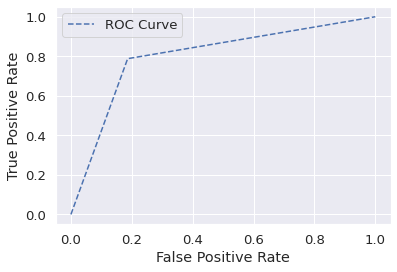

In [19]:
#Classification Algo LogReg

res_ML_LogReg = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 KNN


applying KNN algorithm without FS, REG or CV....


Prediction Vector: 
 [1 1 0 ... 0 0 0]

 Accuracy: 
 79.17599641737573

 Precision of event Happening: 
 80.4902962206333

 Recall of event Happening: 
 74.19962335216572

 AUC: 
 0.7894438896045519

 F-Score:
 0.772170504654581

 Confusion Matrix: 
 [[980 191]
 [274 788]]


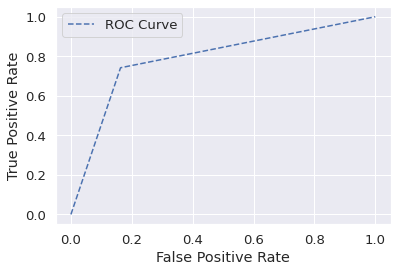

In [20]:
res_ML_KNN = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 GradientBoosting


applying GradientBoosting algorithm without FS, REG or CV....


Prediction Vector: 
 [0 1 1 ... 1 1 1]

 Accuracy: 
 83.78862516793552

 Precision of event Happening: 
 81.59564823209429

 Recall of event Happening: 
 84.98583569405099

 AUC: 
 0.8384726196968307

 F-Score:
 0.8325624421831638

 Confusion Matrix: 
 [[971 203]
 [159 900]]


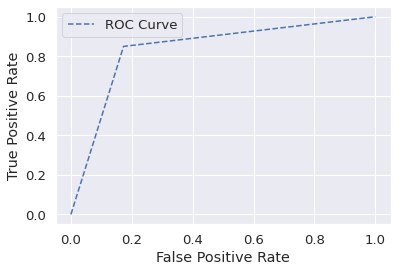

In [21]:
res_ML_GradientBoosting = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 AdaBoost


applying AdaBoost algorithm without FS, REG or CV....


Prediction Vector: 
 [0 1 1 ... 1 1 0]

 Accuracy: 
 82.93775190326915

 Precision of event Happening: 
 84.08662900188324

 Recall of event Happening: 
 80.81447963800905

 AUC: 
 0.8291610506723148

 F-Score:
 0.8241808952468851

 Confusion Matrix: 
 [[959 169]
 [212 893]]


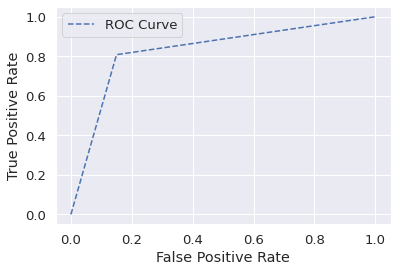

In [22]:
res_ML_AdaBoost = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 SVM


applying SVM algorithm without FS, REG or CV....


Prediction Vector: 
 [0 1 1 ... 0 0 1]

 Accuracy: 
 80.60904612628751

 Precision of event Happening: 
 78.50378787878788

 Recall of event Happening: 
 80.09661835748793

 AUC: 
 0.805741856395119

 F-Score:
 0.7929220468675275

 Confusion Matrix: 
 [[971 227]
 [206 829]]


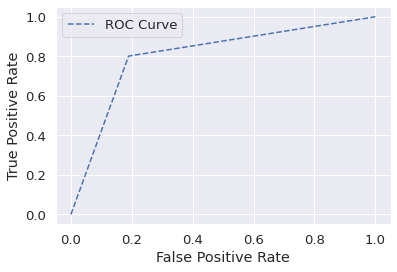

In [23]:
res_ML_SVM = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 DecisionTree


applying DecisionTree algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 1 ... 1 1 0]

 Accuracy: 
 76.89207344379759

 Precision of event Happening: 
 75.09541984732824

 Recall of event Happening: 
 75.5278310940499

 AUC: 
 0.7680673670571514

 F-Score:
 0.75311004784689

 Confusion Matrix: 
 [[930 261]
 [255 787]]


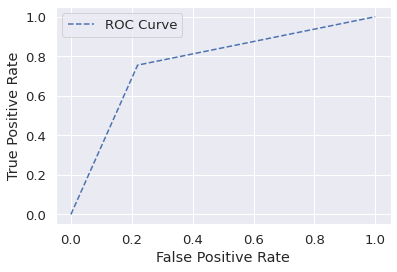

In [24]:
res_ML_DecisionTree = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 RandomForest


applying RandomForest algorithm without FS, REG or CV....


Prediction Vector: 
 [1 1 0 ... 0 0 1]

 Accuracy: 
 84.10210479175997

 Precision of event Happening: 
 81.6976127320955

 Recall of event Happening: 
 86.19402985074626

 AUC: 
 0.841822862432026

 F-Score:
 0.8388561053109397

 Confusion Matrix: 
 [[954 207]
 [148 924]]


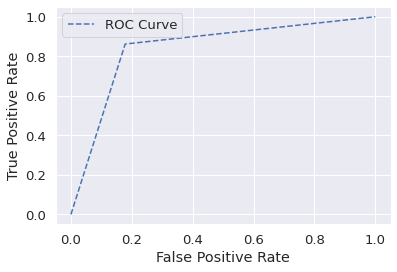

In [25]:
res_ML_RandomForest = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 NaiveBayes


applying NaiveBayes algorithm without FS, REG or CV....


Prediction Vector: 
 [1 0 0 ... 1 1 1]

 Accuracy: 
 74.2498880429915

 Precision of event Happening: 
 70.82251082251082

 Recall of event Happening: 
 77.46212121212122

 AUC: 
 0.7441500283205891

 F-Score:
 0.7399366802351877

 Confusion Matrix: 
 [[840 337]
 [238 818]]


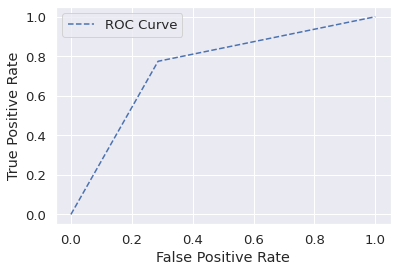

In [28]:
res_ML_NaiveBayes = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 MultiLayerPerceptron


applying MultiLayerPerceptron algorithm without FS, REG or CV....


Prediction Vector: 
 [1 0 1 ... 0 0 1]

 Accuracy: 
 80.96730855351545

 Precision of event Happening: 
 78.8898999090082

 Recall of event Happening: 
 81.79245283018868

 AUC: 
 0.8100705335456578

 F-Score:
 0.8031496062992126

 Confusion Matrix: 
 [[941 232]
 [193 867]]


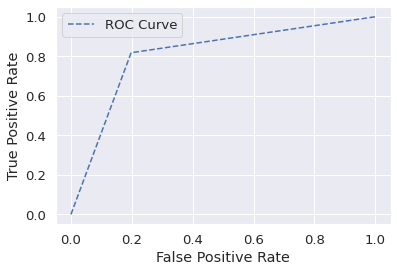

In [29]:
res_ML_MultiLayerPerceptron = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 XgBoost


applying XgBoost algorithm without FS, REG or CV....


[13:35:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [1 0 1 ... 0 0 1]

 Accuracy: 
 83.51992834751455

 Precision of event Happening: 
 81.29496402877699

 Recall of event Happening: 
 84.9624060150376

 AUC: 
 0.8358471027869074

 F-Score:
 0.8308823529411764

 Confusion Matrix: 
 [[961 208]
 [160 904]]


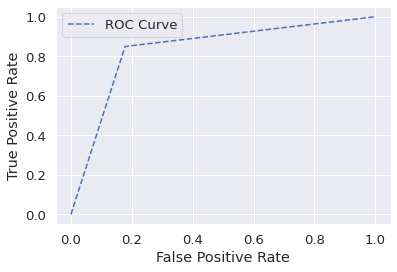

In [30]:
res_ML_XgBoost = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
 LightGbm


applying LightGbm algorithm without FS, REG or CV....


[LightGBM] [Info] Number of positive: 4212, number of negative: 4717
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471721 -> initscore=-0.113235
[LightGBM] [Info] Start training from score -0.113235
Prediction Vector: 
 [1. 0. 1. ... 1. 1. 1.]

 Accuracy: 
 79.3103448275862

 Precision of event Happening: 
 86.56361474435195

 Recall of event Happening: 
 67.59517177344475

 AUC: 
 0.7891004263412722

 F-Score:
 0.7591240875912408

 Confusion Matrix: 
 [[1043  113]
 [ 349  728]]


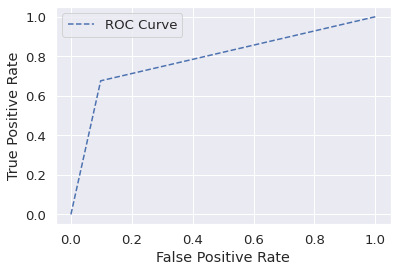

In [31]:
res_ML_LightGbm  = classification_ML(X,y)

## Part 1B
**ML algos with feature selection using RFFS, MIFS and REFS**


In [32]:
#HELPER FUNCTIONS (Taken from my template)

# Helper function to provide list of supported algorithms for Classification
def get_supported_algorithms():
    covered_algorithms = [LogReg, KNN, GradientBoosting, AdaBoost,
                          SVM, DecisionTree, RandomForest, NaiveBayes,
                          MultiLayerPerceptron]
    if XGBClassifier:
        covered_algorithms.append(XgBoost)
    if lgb:
        covered_algorithms.append(LightGbm)
    return covered_algorithms

# Helper function to select important features via RFFS, run supported ML algorithms over dataset with manual split and measure accuracy without Cross Validation - select features with importance >=threshold
def MachineLearningwithRFFS(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col=label_col)
    res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY, trees=10, regression=regression)
    
    impftrs = list(res[res > threshold].keys())
    #impftrs.append(label_col)
    
    print ("Selected Features =" + str(impftrs))
    print(df.shape)
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}


#Train Test Split: splitting manually
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    return X, trainX, testX, trainY, testY

# Helper function to get fetaure importance metrics via Random Forest Feature Selection (RFFS)
def RFfeatureimportance(df, trainX, testX, trainY, testY, trees=35, random=None, regression=False):
    if regression:
        clf  = RandomForestRegressor(n_estimators=trees, random_state=random)
    else:
        clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX,trainY)
    #validationmetrics(clf,testX,testY)
    res = pd.Series(clf.feature_importances_, index=df.columns.values).sort_values(ascending=False)*100
    print(res)
    return res

# Helper function to run all algorithms provided in algo_list over given dataframe, without cross validation
# By default it will run all supported algorithms 
def run_algorithms(df, label_col, algo_list=get_supported_algorithms(), feature_list=[]):
    """
    Run Algorithms with manual split
    
    """
    # Lets make a copy of dataframe and work on that to be on safe side 
    _df = df.copy()
    
    if feature_list:
        impftrs = feature_list
        impftrs.append(label_col)
        _df = _df[impftrs]
    
    _df, trainX, testX, trainY, testY = traintestsplit(_df, 0.2, 91, label_col=label_col)
    algo_model_map = {}
    for algo in algo_list:
        print("============ " + algo.__name__ + " ===========")
        res = algo(trainX, testX, trainY, testY)
        algo_model_map[algo.__name__] = res.get("model_obj", None)
        print ("============================== \n")
    
    return algo_model_map

# Helper function to select important features via MIFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
def MachineLearningwithMIFS(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    res = mutualinformation(df_cpy, label_col=label_col, regression=regression)
    
    #include all selected features in impftrs
    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}

# ## Mutual Information Feature Selection (MIFS) 
# MachineLearningwithMIFS() => Helper function to select important features and run supported ML algorithms over dataset

# mutualinformation()  => Helper function to get fetaure importance metrics via Mutual Information Classifier/Regressor.
def mutualinformation(df, label_col, regression=False):
    df_cpy = df.copy()
    y = df_cpy[label_col].copy()
    X = df_cpy.drop(label_col,axis=1)
    if regression:
        mutual_info = mutual_info_regression(X,y,random_state=35)
    else:
        mutual_info = mutual_info_classif(X,y,random_state=35)
    results = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)*100
    print(results)
    return results

# Helper function to select important features via REFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
# flexible enough to use any algorithm for recursive feature elimination and any alogorithm to run on selected features
def GenericREFS(df, label_col,
                algo_list=get_supported_algorithms(),
                re_algo=RandomForestClassifier,
                **kwargs):
    
    X,y = XYsplit(df, label_col)
    clf = re_algo(**kwargs)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    feature_list = X.columns[selector.support_].tolist()
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=feature_list)
    return {"selected_features": feature_list, "results": results}



In [33]:
## Defining function for ML Algos with RFFS (Again, taken from my template)

def classification_ML_FS(df,col,threshold=5,algo_list=get_supported_algorithms(), regression=False, re_algo=RandomForestClassifier,**kwargs):
      
    FS= str(input('Which FS Algo?\n\n[RFFS, MIFS, REFS]\n'))
    
    
    if FS =='RFFS':
        print('applying FS with RFFS and then applying all ML algos....\n\n')
        MachineLearningwithRFFS(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())
   
    elif FS =='MIFS':
        print('applying FS with MIFS and then applying all ML algos....\n\n')
        MachineLearningwithMIFS(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())

    elif FS =='REFS':
            print('applying FS with REFS and then applying all ML algos....\n\n')
            GenericREFS(df, col, algo_list=get_supported_algorithms(), re_algo=RandomForestClassifier,**kwargs)
             
    else:
        print('\ninvalid FS algo entered ... check exact match from list')



Which FS Algo?

[RFFS, MIFS, REFS]
 RFFS


applying FS with RFFS and then applying all ML algos....


duration     35.537855
balance       8.902506
month         8.826185
age           8.387493
day           6.837649
pdays         5.057272
contact       4.549515
job           4.077745
housing       3.607151
campaign      3.337090
poutcome      3.086000
previous      2.459898
education     2.065288
marital       1.932281
loan          1.176723
default       0.159349
dtype: float64
Selected Features =['duration', 'balance', 'month', 'age', 'day', 'pdays']
(11162, 17)
============ LogReg ===========
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 74.2498880429915

 Precision of event Happening: 
 78.28054298642535

 Recall of event Happening: 
 64.37209302325581

 AUC: 
 0.738958910712134

 F-Score:
 0.7064828994384891

 Confusion Matrix: 
 [[966 192]
 [383 692]]


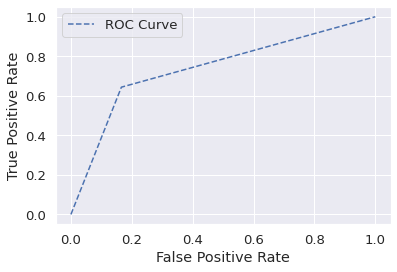


============ KNN ===========
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 81.10165696372593

 Precision of event Happening: 
 80.31569173630456

 Recall of event Happening: 
 80.46511627906978

 AUC: 
 0.8107884484074386

 F-Score:
 0.8039033457249072

 Confusion Matrix: 
 [[946 212]
 [210 865]]


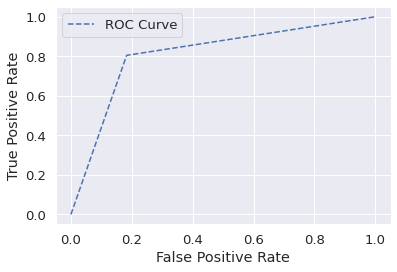


============ GradientBoosting ===========
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 82.93775190326915

 Precision of event Happening: 
 81.0931899641577

 Recall of event Happening: 
 84.18604651162791

 AUC: 
 0.8298248784994177

 F-Score:
 0.8261068005476951

 Confusion Matrix: 
 [[947 211]
 [170 905]]


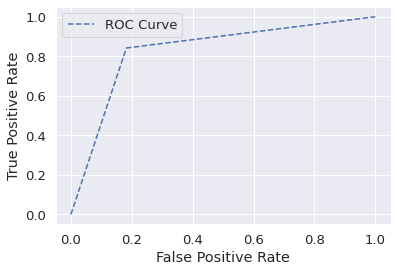


============ AdaBoost ===========
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 80.34034930586654

 Precision of event Happening: 
 80.75435203094777

 Recall of event Happening: 
 77.67441860465117

 AUC: 
 0.802448086114793

 F-Score:
 0.7918444760550024

 Confusion Matrix: 
 [[959 199]
 [240 835]]


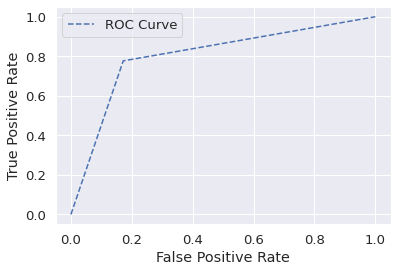


============ SVM ===========
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 79.71339005821764

 Precision of event Happening: 
 78.95716945996276

 Recall of event Happening: 
 78.88372093023256

 AUC: 
 0.7968365666546171

 F-Score:
 0.7892042810609585

 Confusion Matrix: 
 [[932 226]
 [227 848]]


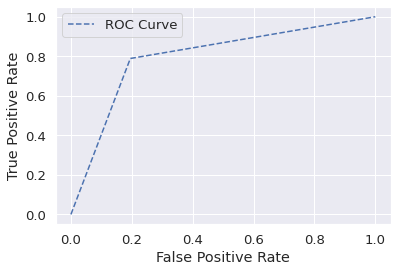


============ DecisionTree ===========
Prediction Vector: 
 [1 1 0 ... 0 1 0]

 Accuracy: 
 75.5038065382893

 Precision of event Happening: 
 74.30939226519338

 Recall of event Happening: 
 75.06976744186046

 AUC: 
 0.754882515965779

 F-Score:
 0.7468764460897732

 Confusion Matrix: 
 [[879 279]
 [268 807]]


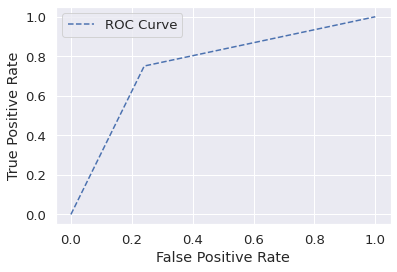


============ RandomForest ===========
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 83.47514554411106

 Precision of event Happening: 
 81.18374558303887

 Recall of event Happening: 
 85.48837209302326

 AUC: 
 0.8354729485480178

 F-Score:
 0.832804712279112

 Confusion Matrix: 
 [[945 213]
 [156 919]]


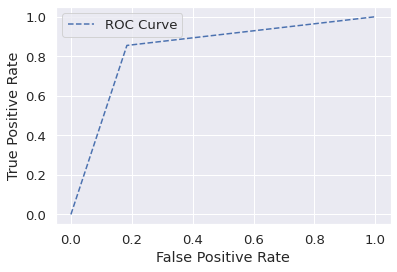


============ NaiveBayes ===========
Prediction Vector: 
 [1 1 1 ... 0 1 1]

 Accuracy: 
 70.44334975369459

 Precision of event Happening: 
 76.98309492847855

 Recall of event Happening: 
 55.06976744186046

 AUC: 
 0.6989239667429811

 F-Score:
 0.6420824295010845

 Confusion Matrix: 
 [[981 177]
 [483 592]]


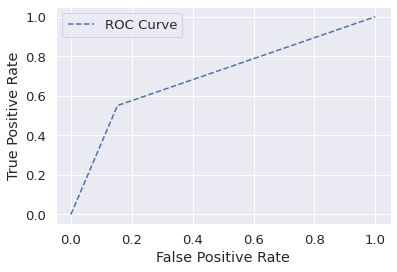


============ MultiLayerPerceptron ===========
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 77.47424988804299

 Precision of event Happening: 
 76.67910447761194

 Recall of event Happening: 
 76.46511627906976

 AUC: 
 0.7743808490982849

 F-Score:
 0.7657196087564042

 Confusion Matrix: 
 [[908 250]
 [253 822]]


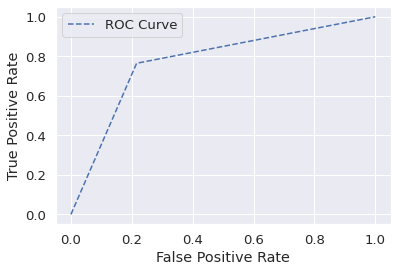


============ XgBoost ===========
[13:36:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [1 1 1 ... 0 1 0]

 Accuracy: 
 81.9973130317958

 Precision of event Happening: 
 81.18628359592215

 Recall of event Happening: 
 81.48837209302326

 AUC: 
 0.8197907378399003

 F-Score:
 0.8133704735376044

 Confusion Matrix: 
 [[955 203]
 [199 876]]


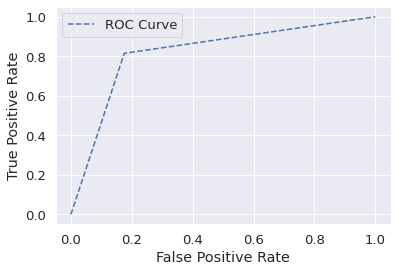


============ LightGbm ===========
[LightGBM] [Info] Number of positive: 4214, number of negative: 4715
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471945 -> initscore=-0.112337
[LightGBM] [Info] Start training from score -0.112337
Prediction Vector: 
 [1. 1. 1. ... 0. 0. 0.]

 Accuracy: 
 74.2498880429915

 Precision of event Happening: 
 85.31073446327684

 Recall of event Happening: 
 56.18604651162791

 AUC: 
 0.736025223922561

 F-Score:
 0.6775098149186765

 Confusion Matrix: 
 [[1054  104]
 [ 471  604]]


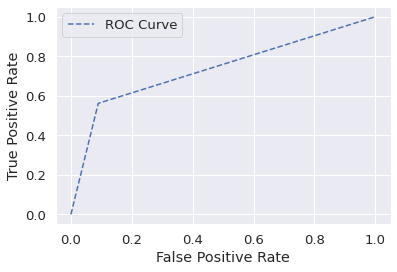

In [34]:
res_ML_RFFS = classification_ML_FS(df,LABEL_COL, threshold=3, algo_list= get_supported_algorithms(),re_algo=RandomForestClassifier)

## Part 1C
**Applying ML algos with FS and Cross Validation both**

In [35]:
#HELPER FUNCTIONS


def MachineLearningwithRFFS_CV(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col=label_col)
    res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY,
                              trees=10, regression=regression)

    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    print(df.shape)
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=impftrs, cross_valid_method=cross_valid_method)
    return {"selected_features": impftrs, "results": results}

def cross_valid_stratified_kf(X, y, split=10, random=None, shuffle=False):
    """
    Generator function for Stratified KFold cross validation
    
    """
    skf = StratifiedKFold(n_splits=split, random_state=random, shuffle=shuffle)
    for train_index, test_index in skf.split(X, y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        yield trainX,trainY,testX,testY
        
# With stratified kfold validation support
def run_algorithms_cv(df, label_col, algo_list=get_supported_algorithms(), feature_list=[], cross_valid_method=cross_valid_stratified_kf):
    """
    Run Algorithms with cross validation
    
    """
    _df = df.copy()
    X,y = XYsplit(_df, label_col)
    
    # Select features if specified by driver program
    if feature_list:
        X = X[feature_list]
    
    result = {}
    algo_model_map = {}
    for algo in algo_list:
        clf = None
        result[algo.__name__] = dict()
        for trainX,trainY,testX,testY  in cross_valid_method(X, y, split=10):
            res_algo = algo(trainX, testX, trainY, testY, verbose=False, clf=clf)
            # Get trained model so we could use it again in the next iteration
            clf = res_algo.get("model_obj", None)
            
            for k,v in res_algo.items():
                if k == "model_obj":
                    continue
                if k not in result[algo.__name__].keys():
                    result[algo.__name__][k] = list()
                result[algo.__name__][k].append(v)
                
        algo_model_map[algo.__name__] = clf
            
    score_map = dict()
    # let take average scores for all folds now
    for algo, metrics in result.items():
        print("============ " + algo + " ===========")
        score_map[algo] = dict()
        for metric_name, score_lst in metrics.items():
            score_map[algo][metric_name] = np.mean(score_lst)
        print(score_map[algo])
        print ("============================== \n")
        score_map[algo]["model_obj"] = algo_model_map[algo]
    
    return score_map


# Helper function to select important features via MIFS, run supported ML algorithms over dataset with manual split and measure accuracy, with CV ... select features with importance >=threshold
def MachineLearningwithMIFS_CV(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    res = mutualinformation(df_cpy, label_col=label_col, regression=regression)
    
    #include all selected features in impftrs
    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=impftrs, cross_valid_method=cross_valid_method)
    return {"selected_features": impftrs, "results": results}

# Helper function to select important features via REFS, run supported ML algorithms over dataset with manual split and measure accuracy, with CV ... select features with importance >=threshold
# flexible enough to use any algorithm for recursive feature elimination and any alogorithm to run on selected features
def GenericREFS_CV(df, label_col,
                algo_list=get_supported_algorithms(),
                regression=False,
                re_algo=RandomForestClassifier,
                **kwargs):
    
    X,y = XYsplit(df, label_col)
    clf = re_algo(**kwargs)
    selector = RFECV(estimator=clf, step=1, cv=10)
    selector = selector.fit(X,y)
    feature_list = X.columns[selector.support_].tolist()
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=feature_list, cross_valid_method=cross_valid_method)
    return {"selected_features": feature_list, "results": results}

In [36]:
#Executing all ML functions with FS and CV. (Without regularization) -- (TAKEN FROM MY TEMPLATE)

def classification_ML_FS_CV(df,col,threshold=5,algo_list=get_supported_algorithms(), regression=False, re_algo=RandomForestClassifier,**kwargs):
      
    FS_CV= str(input('Which FS Algo?\n\n[RFFS_CV, MIFS_CV, REFS_CV]\n'))
    
    
    if FS_CV =='RFFS_CV':
        print('applying FS with RFFS and then running ML algos with CV....\n\n')
        MachineLearningwithRFFS_CV(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())
   
    elif FS_CV =='MIFS_CV':
        print('applying FS with MIFS and then running all ML algos with CV....\n\n')
        MachineLearningwithMIFS_CV(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())

    elif FS_CV =='REFS_CV':
            print('applying FS with REFS and then running all ML algos with CV....\n\n')
            GenericREFS_CV(df, col, algo_list=get_supported_algorithms(), re_algo=RandomForestClassifier,**kwargs)
             
    else:
        print('\ninvalid FS algo entered ... check exact match from list')



In [37]:
res_ML_RFFS_CV = classification_ML_FS_CV(df,LABEL_COL, threshold=3, algo_list=get_supported_algorithms(),re_algo= RandomForestClassifier)

Which FS Algo?

[RFFS_CV, MIFS_CV, REFS_CV]
 RFFS_CV


applying FS with RFFS and then running ML algos with CV....


duration     35.924040
month         9.304872
balance       9.032211
age           8.240700
day           7.343967
poutcome      4.859131
job           3.927044
housing       3.488693
contact       3.448974
pdays         3.405453
campaign      3.189720
previous      2.569611
education     2.294142
marital       1.944099
loan          0.936859
default       0.090484
dtype: float64
Selected Features =['duration', 'month', 'balance', 'age', 'day']
(11162, 17)
[13:37:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to

## Part 1D 
**Applying ML algos with Cross Validation only**

In [38]:
def classification_ML_CV(df, label_col, algo_list=get_supported_algorithms(), feature_list=[], cross_valid_method=cross_valid_stratified_kf):
    """
    Run Algorithms with cross validation
    
    """
    _df = df.copy()
    X,y = XYsplit(_df, label_col)
    
    # Select features if specified by driver program
    if feature_list:
        X = X[feature_list]
    
    result = {}
    algo_model_map = {}
    for algo in algo_list:
        clf = None
        result[algo.__name__] = dict()
        for trainX,trainY,testX,testY  in cross_valid_method(X, y, split=10):
            res_algo = algo(trainX, testX, trainY, testY, verbose=False, clf=clf)
            # Get trained model so we could use it again in the next iteration
            clf = res_algo.get("model_obj", None)
            
            for k,v in res_algo.items():
                if k == "model_obj":
                    continue
                if k not in result[algo.__name__].keys():
                    result[algo.__name__][k] = list()
                result[algo.__name__][k].append(v)
                
        algo_model_map[algo.__name__] = clf
            
    score_map = dict()
    # let take average scores for all folds now
    for algo, metrics in result.items():
        print("============ " + algo + " ===========")
        score_map[algo] = dict()
        for metric_name, score_lst in metrics.items():
            score_map[algo][metric_name] = np.mean(score_lst)
        print(score_map[algo])
        print ("============================== \n")
        score_map[algo]["model_obj"] = algo_model_map[algo]
    
    return score_map

In [39]:
res_ML_CV = classification_ML_CV(df,LABEL_COL)

[13:40:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Evaluation of ML Algos

**We can observe from the above executions that the best performing ML Algorithm for this classification dataset is Random Forest (Without any FS or CV)**

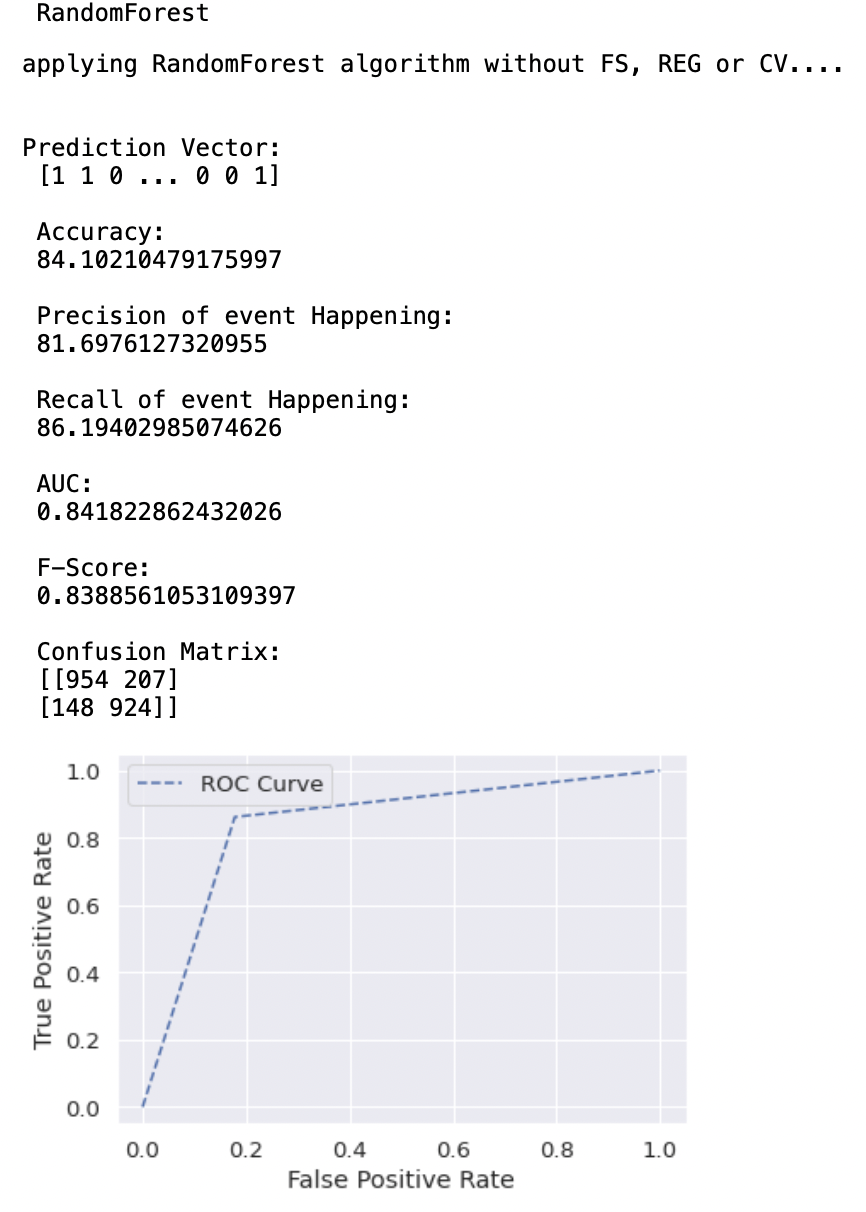

**Random Forest (without FS or CV)**

* AUC: 0.842


* Accuracy: 84.1%
* Precision: 81.7%
* Recall: 86.2%
* F-Score: 0.834

# Part 2: Markov Chain Monte Carlo

In [42]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from pathlib import Path
import pickle
from collections import OrderedDict
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
                             precision_recall_curve) 
from mlxtend.plotting import plot_confusion_matrix

import theano
import pymc3 as pm
from pymc3.variational.callbacks import CheckParametersConvergence
import statsmodels.formula.api as smf

import arviz as az
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from IPython.display import HTML

**Models**

In [47]:
data = df

data_path = Path('data')
fig_path = Path('figures')
model_path = Path('models')
for p in [data_path, fig_path, model_path]:
    if not p.exists():
        p.mkdir()

In [40]:
simple_model = 'deposit ~ duration + pdays + previous'
full_model = 'deposit ~ duration + pdays + previous + education + balance +  loan + poutcome + campaign +  housing + contact'

**MAP Inference**

A probabilistic program consists of observed and unobserved random variables. We define the observed RVs via likelihood distributions and unobserved RVs via prior distributions. PyMC3 includes numerous probability distributions for this purpose.

Logistic regression models the probability that individual i subscribes to a deposit based on  k features.

**Manual Model Specification**

We will use the context manager with to define a manual_logistic_model that we can refer to later as a probabilistic model:

* The random variables for the unobserved parameters for intercept and features are expressed using uninformative priors that assume normal distributions with mean  0 and standard deviation of  100.

* The likelihood combines the parameters with the data according to the specification of the logistic regression.

* The outcome is modeled as a Bernoulli RV with success probability given by the likelihood.

In [45]:
with pm.Model() as manual_logistic_model:
    # random variables for coefficients with
    # uninformative priors for each parameter

    intercept = pm.Normal('intercept', 0, sd=100)
    beta_1 = pm.Normal('beta_1', 0, sd=100)
    beta_2 = pm.Normal('beta_2', 0, sd=100)
    beta_3 = pm.Normal('beta_3', 0, sd=100)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    likelihood = pm.invlogit(intercept + beta_1 * data.duration + beta_2 * data.pdays + beta_3 * data.previous)

    # Bernoulli random vector with probability of success
    # given by sigmoid function and actual data as observed
    pm.Bernoulli(name='logit', p=likelihood, observed=data.deposit)

In [48]:
manual_logistic_model.model

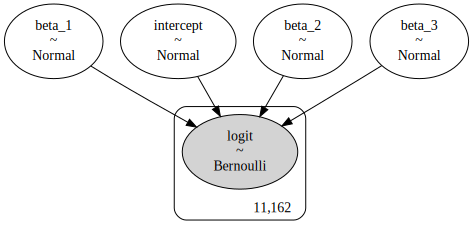

In [50]:
pm.model_to_graphviz(manual_logistic_model)


**MAP Estimate**

MAP estimation leverages that the evidence is a constant factor that scales the posterior to meet the requirements for a probability distribution. Since the evidence does not depend on θ

We obtain point MAP estimates for the three parameters using the just defined model’s .find_MAP() method:

In [51]:
with manual_logistic_model:
    # compute maximum a-posteriori estimate
    # for logistic regression weights
    manual_map_estimate = pm.find_MAP()

In [52]:
def print_map(result):
    return pd.Series({k: np.asscalar(v) for k, v in result.items()})

In [53]:
print_map(manual_map_estimate)

intercept    0.051369
beta_1       1.561395
beta_2       0.260651
beta_3       0.306804
dtype: float64

**GLM Model**

PyMC3 includes numerous common models so that we can usually leave the manual specification for custom applications.
The following code defines the same logistic regression as a member of the Generalized Linear Models (GLM) family.

In [54]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(simple_model,
                            data,
                            family=pm.glm.families.Binomial())

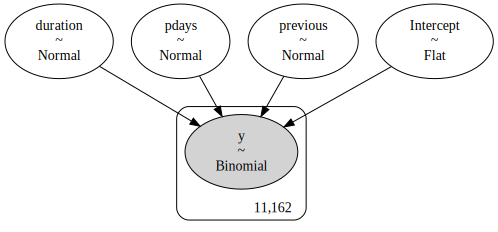

In [55]:
pm.model_to_graphviz(logistic_model)

PyMC3 solves the optimization problem of finding the posterior point with the highest density BFGS algorithm but offers several alternatives provided by the scipy library. The result is virtually identically to the corresponding statsmodels estimate.

In [56]:
model = smf.logit(formula=simple_model, data=data[['deposit', 'duration', 'pdays', 'previous']])
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.538611
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11158
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Jan 2022   Pseudo R-squ.:                  0.2214
Time:                        13:57:48   Log-Likelihood:                -6012.0
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0514      0.023      2.192      0.028       0.005       0.097
duration       1.5614      0.

In [57]:
print_map(manual_map_estimate)

intercept    0.051369
beta_1       1.561395
beta_2       0.260651
beta_3       0.306804
dtype: float64

In [58]:
result.params

Intercept    0.051370
duration     1.561394
pdays        0.260652
previous     0.306804
dtype: float64

### Markov Chain Monte Carlo

Markov chains are stochastic models that describe sequences of possible events. Each event comes from a set of outcomes, and each outcome determines which outcome occurs next, according to a fixed set of probabilities. An important feature of Markov chains is that they are memoryless: everything that you would possibly need to predict the next event is available in the current state, and no new information comes from knowing historical events.
Monte Carlo methods rely on repeated random sampling to approximate results that may be deterministic, but that does not permit an analytic, exact solution.
Many algorithms apply the Monte Carlo method to a Markov Chain, and generally proceed as follows:

- Start at the current position.
- Draw a new position from a proposal distribution.
- Evaluate the probability of the new position in light of data and prior distributions:
- If sufficiently likely, move to the new position
- Otherwise, remain at the current position
- Repeat from step 1.
- After a given number of iterations, return all accepted positions.

In [59]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(formula=full_model,
                            data=data,
                            family=pm.glm.families.Binomial())

In [60]:
logistic_model.basic_RVs

[Intercept ~ Flat,
 duration ~ Normal,
 pdays ~ Normal,
 previous ~ Normal,
 education ~ Normal,
 balance ~ Normal,
 loan ~ Normal,
 poutcome ~ Normal,
 campaign ~ Normal,
 housing ~ Normal,
 contact ~ Normal,
 y ~ Binomial]

**Hamiltonian Monte Carlo – going NUTS**

By default, PyMC3 automatically selects the most efficient sampler and initializes the sampling process for efficient convergence. For a continuous model, PyMC3 chooses the NUTS sampler. It also runs variational inference via ADVI to find good starting parameters for the sampler.

Hamiltonian Monte Carlo (HMC) is a hybrid method that leverages the first-order derivative information of the gradient of the likelihood to propose new states for exploration and overcome some of the challenges of MCMC. In addition, it incorporates momentum to efficiently jump around the posterior. As a result, it converges faster to a high-dimensional target distribution than simpler random-walk Metropolis or Gibbs sampling.

**To see what the convergence looks like, we first draw  1,000 samples after tuning the sampler for 1,000 iterations that will be discarded. The sampling process can be parallelized for multiple chains using the cores argument.**

In [61]:
with logistic_model:
    trace = pm.sample(tune=1000,
                         draws=1000,
                         chains=4,
                         init = 'adapt_diag',
                         cores=3)

**Inspect Trace**

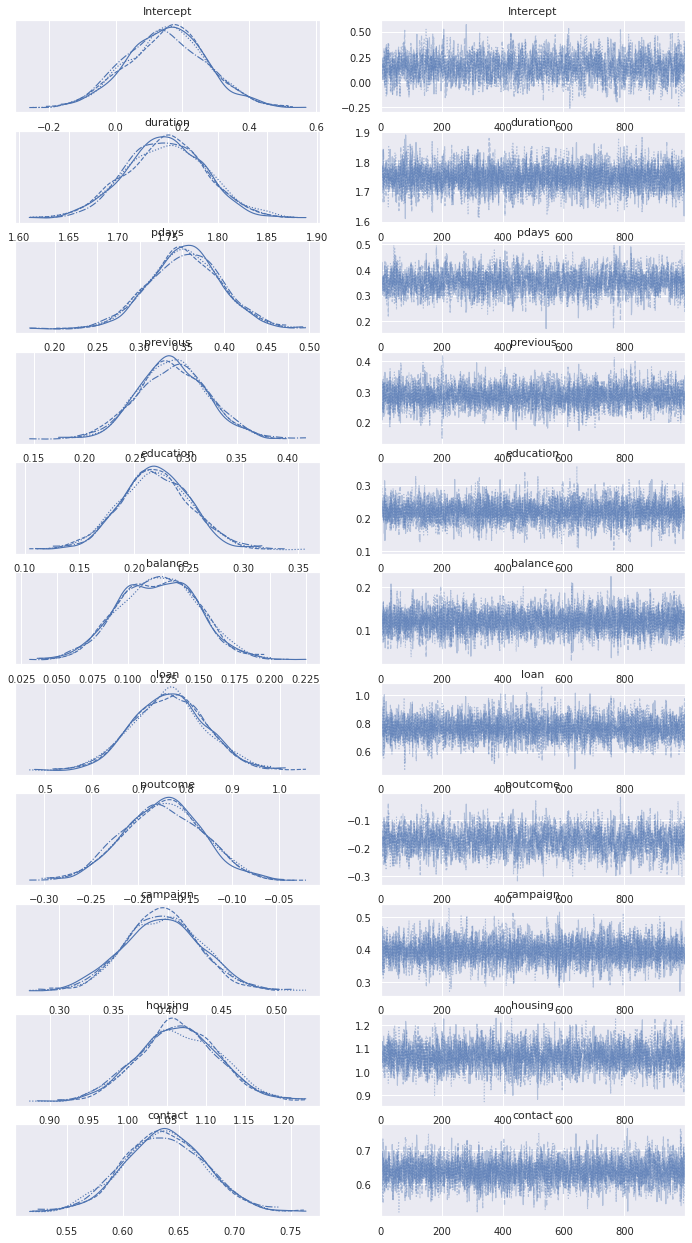

In [62]:
pm.plot_trace(trace);

**Define the Model**

We will use a slightly more complicated model to illustrate Markov chain Monte Carlo inference:

* full_model = 'deposit ~ duration + pdays + previous + education + balance +  loan + poutcome + campaign +  housing + contact'

In [63]:
with open(model_path / 'logistic_model_mh.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model, 'trace': trace}, buff)

PyMC3 produces various summary statistics for a sampler. These are available as individual functions in the stats module, or by providing a trace to the pm.summary() function shown below.

In [64]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.152,0.120,-0.054,0.396,0.003,0.002,2026.0,2391.0,1.0
duration,1.748,0.041,1.673,1.825,0.001,0.000,5652.0,2998.0,1.0
pdays,0.354,0.043,0.275,0.435,0.001,0.001,2551.0,2976.0,1.0
previous,0.287,0.034,0.223,0.353,0.000,0.000,4896.0,2870.0,1.0
education,0.220,0.032,0.163,0.283,0.000,0.000,5617.0,2884.0,1.0
balance,0.121,0.027,0.071,0.171,0.000,0.000,4934.0,2707.0,1.0
loan,0.764,0.078,0.624,0.917,0.001,0.001,5020.0,2636.0,1.0
poutcome,-0.173,0.042,-0.255,-0.098,0.001,0.001,2024.0,2315.0,1.0
campaign,0.395,0.035,0.328,0.459,0.000,0.000,5579.0,2950.0,1.0
housing,1.065,0.052,0.964,1.159,0.001,0.001,4222.0,3251.0,1.0


In [65]:
draws = 100

trace_df = pm.trace_to_dataframe(trace).assign(
    chain=lambda x: x.index // draws)

trace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Intercept  4000 non-null   float64
 1   duration   4000 non-null   float64
 2   pdays      4000 non-null   float64
 3   previous   4000 non-null   float64
 4   education  4000 non-null   float64
 5   balance    4000 non-null   float64
 6   loan       4000 non-null   float64
 7   poutcome   4000 non-null   float64
 8   campaign   4000 non-null   float64
 9   housing    4000 non-null   float64
 10  contact    4000 non-null   float64
 11  chain      4000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 375.1 KB


**Persist Results**

In [66]:
with open(model_path / 'logistic_model_nuts.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model,
                 'trace': trace}, buff)

In [67]:
with open(model_path / 'logistic_model_nuts.pkl', 'rb') as buff:
    data0 = pickle.load(buff)  

logistic_model, trace_NUTS = data0['model'], data0['trace']

**Combine Traces**

In [68]:
draws = 10000

df = pm.trace_to_dataframe(trace_NUTS).iloc[200:].reset_index(
    drop=True).assign(chain=lambda x: x.index // draws)

trace_df = pd.concat([trace_df.assign(samples=100),
                      df.assign(samples=10000)])
trace_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7800 entries, 0 to 3799
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Intercept  7800 non-null   float64
 1   duration   7800 non-null   float64
 2   pdays      7800 non-null   float64
 3   previous   7800 non-null   float64
 4   education  7800 non-null   float64
 5   balance    7800 non-null   float64
 6   loan       7800 non-null   float64
 7   poutcome   7800 non-null   float64
 8   campaign   7800 non-null   float64
 9   housing    7800 non-null   float64
 10  contact    7800 non-null   float64
 11  chain      7800 non-null   int64  
 12  samples    7800 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 853.1 KB


**Visualize both traces**

In [69]:
trace_df_long = pd.melt(trace_df, id_vars=['samples', 'chain'])
trace_df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   samples   85800 non-null  int64  
 1   chain     85800 non-null  int64  
 2   variable  85800 non-null  object 
 3   value     85800 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ MB


**Convergence**

We can visualize the samples over time and their distributions to check the quality of the results. The following charts show the posterior distributions after an initial  100 and an additional  10,000 samples, respectively, and illustrate how convergence implies that multiple chains identify the same distribution. The pm.trace_plot() function shows the evolution of the samples as well.

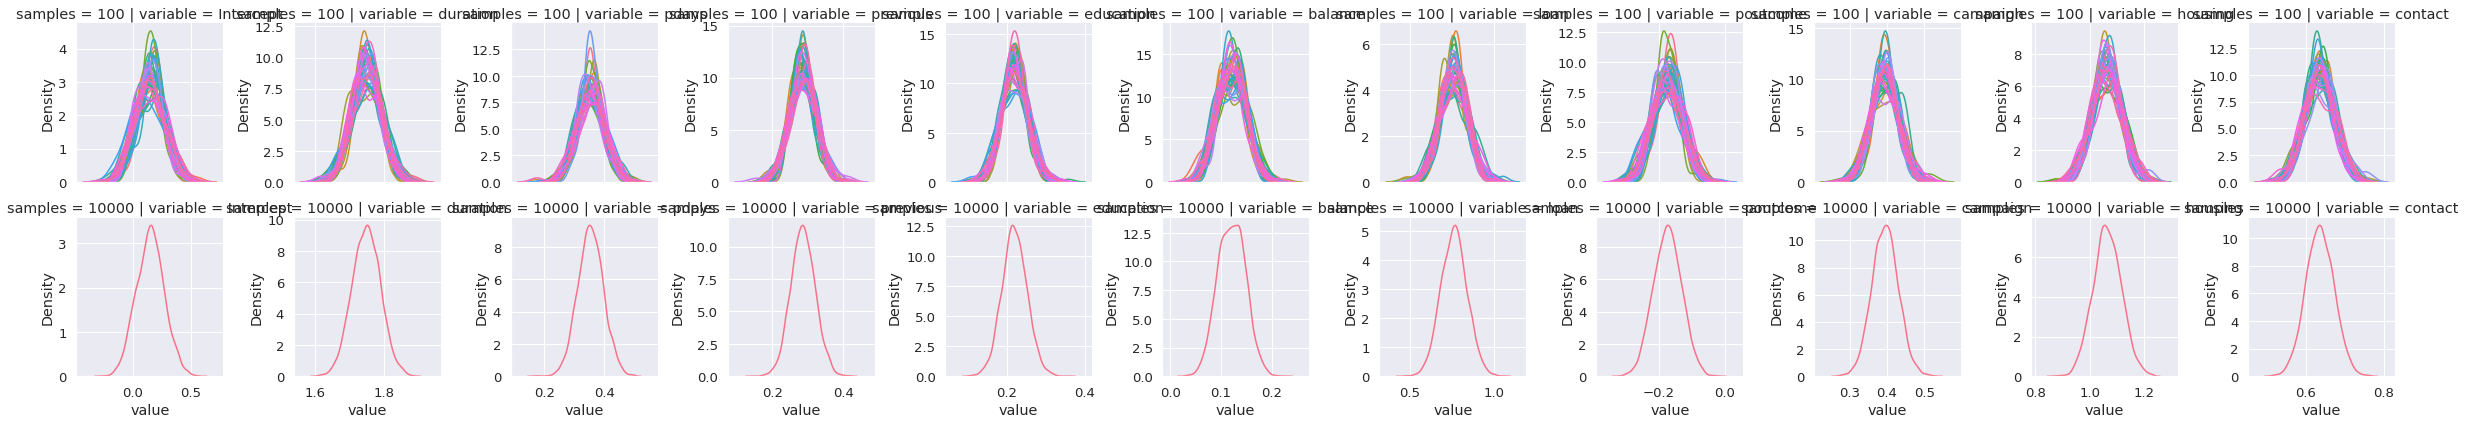

In [70]:
g = sns.FacetGrid(trace_df_long, col='variable', row='samples',
                  hue='chain', sharex='col', sharey=False)
g = g.map(sns.distplot, 'value', hist=False, rug=False)

**Estimate Odds Ratio**

An odds ratio (OR) is a measure of association between a certain property A and a second property B in a population. Specifically, it tells you how the presence or absence of property A has an effect on the presence or absence of property B.

The OR is also used to figure out if a particular exposure (like eating processed meat) is a risk factor for a particular outcome (such as colon cancer), and to compare the various risk factors for that outcome. As long as you have two properties you think are linked, you can calculate the odds.

In [71]:
b = trace['duration']
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)
lb, ub = np.exp(lb), np.exp(ub)
print(f'P({lb:.3f} < Odds Ratio < {ub:.3f}) = 0.95')

P(5.299 < Odds Ratio < 6.224) = 0.95


We can interpret something along those lines: "With probability  0.95 the odds ratio is greater than  5.299 and less than  6.224 so the duration effect takes place because a person with a longer duration has at least  5.299 higher probability to subscribe to a term deposit than a person with a lower duration, while holding all the other variables constant.

**Computing Credible Intervals**

We can compute the credible intervals, the Bayesian counterpart of confidence intervals, as percentiles of the trace. The resulting boundaries reflect our confidence about the range of the parameter value for a given probability threshold, as opposed to the number of times the parameter will be within this range for a large number of trials.

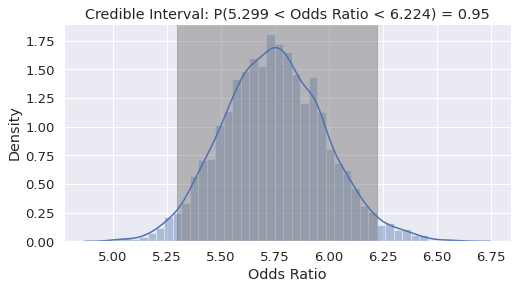

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.distplot(np.exp(b), axlabel='Odds Ratio', ax=ax)
ax.set_title(f'Credible Interval: P({lb:.3f} < Odds Ratio < {ub:.3f}) = 0.95')
ax.axvspan(lb, ub, alpha=0.5, color='gray');

**Variational Inference**


Variational Inference (VI) is a machine learning method that approximates probability densities through optimization. In the Bayesian context, it approximates the posterior distribution as follows:

1. Select a parametrized family of probability distributions
2. Find the member of this family closest to the target, as measured by Kullback-Leibler divergence


Compared to MCMC, Variational Bayes tends to converge faster and scales to large data better. While MCMC approximates the posterior with samples from the chain that will eventually converge arbitrarily close to the target, variational algorithms approximate the posterior with the result of the optimization, which is not guaranteed to coincide with the target.

Variational Inference is better suited for large datasets and to quickly explore many models.In contrast, MCMC will deliver more accurate results on smaller datasets or when time and computational resources pose fewer constraints.

**Run Automatic Differentation Variational Inference (ADVI)**

The interface for variational inference is very similar to the MCMC implementation. We just use the fit() instead of the sample() function, with the option to include an early stopping CheckParametersConvergence callback if the distribution-fitting process converged up to a given tolerance:

In [73]:
with logistic_model:
    callback = CheckParametersConvergence(diff='absolute')
    approx = pm.fit(n=100000, callbacks=[callback])

**Persist Result**

In [74]:
with open(model_path / 'logistic_model_advi.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model,
                 'approx': approx}, buff)

**Sample from approximated distribution**

We can draw samples from the approximated distribution to obtain a trace object as above for the MCMC sampler:

In [75]:
trace_advi = approx.sample(2000)

In [76]:
pm.summary(trace_advi)

Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.150,0.026,0.102,0.200,0.001,0.000,2268.0,2004.0,NaN
duration,1.749,0.041,1.673,1.826,0.001,0.001,1985.0,1845.0,NaN
pdays,0.360,0.026,0.307,0.407,0.001,0.000,1972.0,2004.0,NaN
previous,0.288,0.029,0.235,0.345,0.001,0.000,2046.0,1829.0,NaN
education,0.219,0.018,0.187,0.252,0.000,0.000,2062.0,1956.0,NaN
balance,0.117,0.029,0.060,0.171,0.001,0.000,2044.0,2003.0,NaN
loan,0.762,0.080,0.618,0.920,0.002,0.001,2038.0,1921.0,NaN
poutcome,-0.172,0.010,-0.191,-0.152,0.000,0.000,1853.0,1926.0,NaN
campaign,0.396,0.039,0.320,0.465,0.001,0.001,2066.0,1820.0,NaN
housing,1.067,0.041,0.991,1.144,0.001,0.001,1949.0,1821.0,NaN


Let us visualize the covariance structure of the model

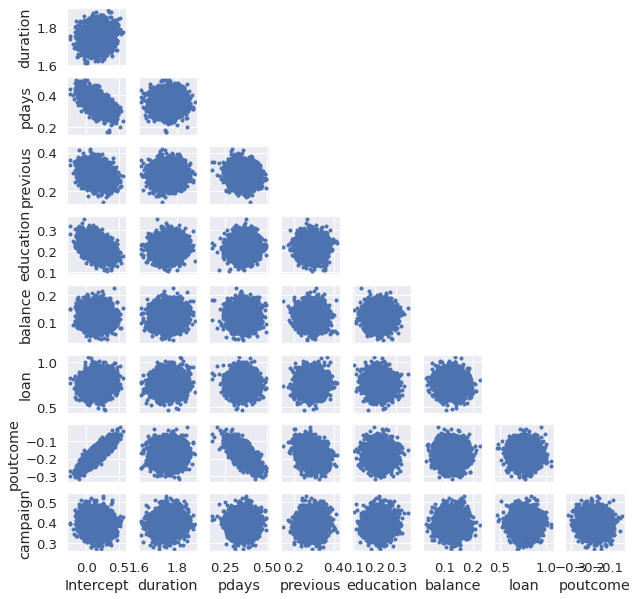

In [77]:
az.plot_pair(trace_NUTS, figsize=(10, 10));

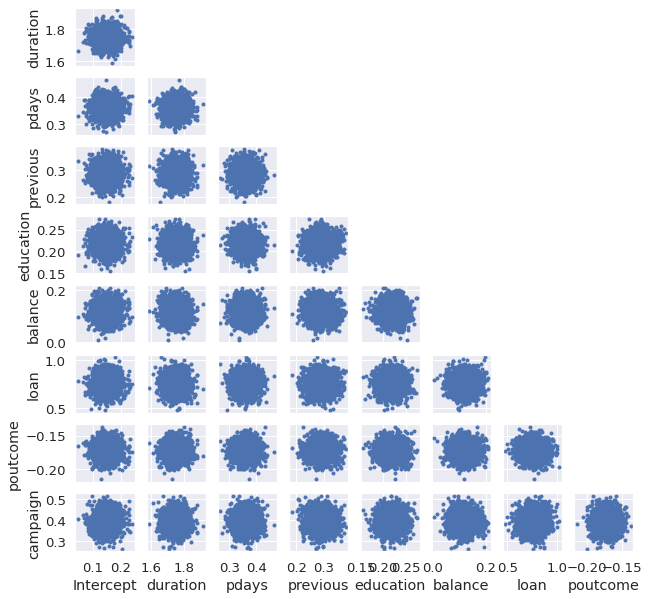

In [78]:
az.plot_pair(trace_advi, figsize=(10, 10));

Clearly, ADVI does not capture (as expected) the interactions between variables because of the mean field approximation, and so it underestimates the overall variance.

**Model Diagnostics**

Bayesian model diagnostics includes validating that the sampling process has converged and consistently samples from high-probability areas of the posterior, and confirming that the model represents the data well.

For high-dimensional models with many variables, it becomes cumbersome to inspect numerous traces. When using NUTS, the energy plot helps to assess problems of convergence. It summarizes how efficiently the random process explores the posterior. The plot shows the energy and the energy transition matrix that should be well matched as in the below example.

**Energy Plot**

When using NUTS, the energy plot helps to assess problems of convergence. It summarizes how efficiently the random process explores the posterior. The plot shows the energy and the energy transition matrix, which should be well-matched.

<AxesSubplot:>

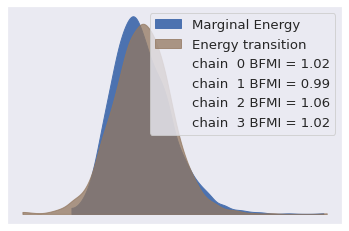

In [79]:
pm.energyplot(trace_NUTS)

**Forest Plot**


A forest plot, also known as a blobbogram, is a graphical display of estimated results from a number of scientific studies addressing the same question, along with the overall results. It was developed for use in medical research as a means of graphically representing a meta-analysis of the results of randomized controlled trials.

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

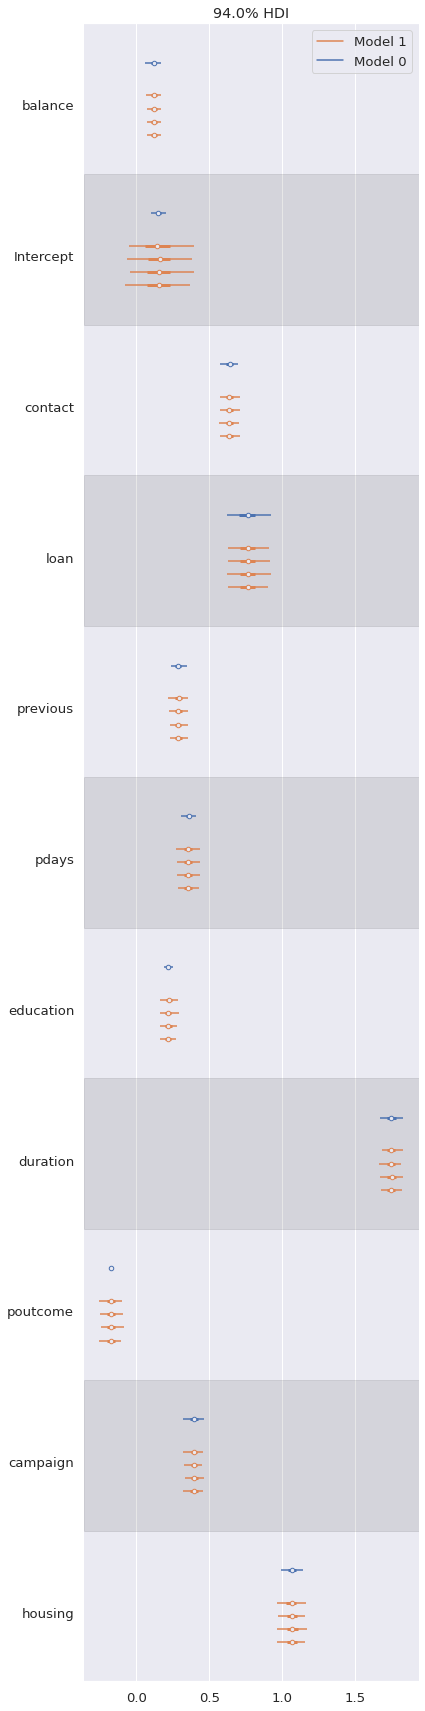

In [80]:
az.plot_forest([trace_advi, trace_NUTS])

**Posterior Plot**

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'loan'}>,
        <AxesSubplot:title={'center':'poutcome'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'housing'}>,
        <AxesSubplot:title={'center':'contact'}>, <AxesSubplot:>]],
      dtype=object)

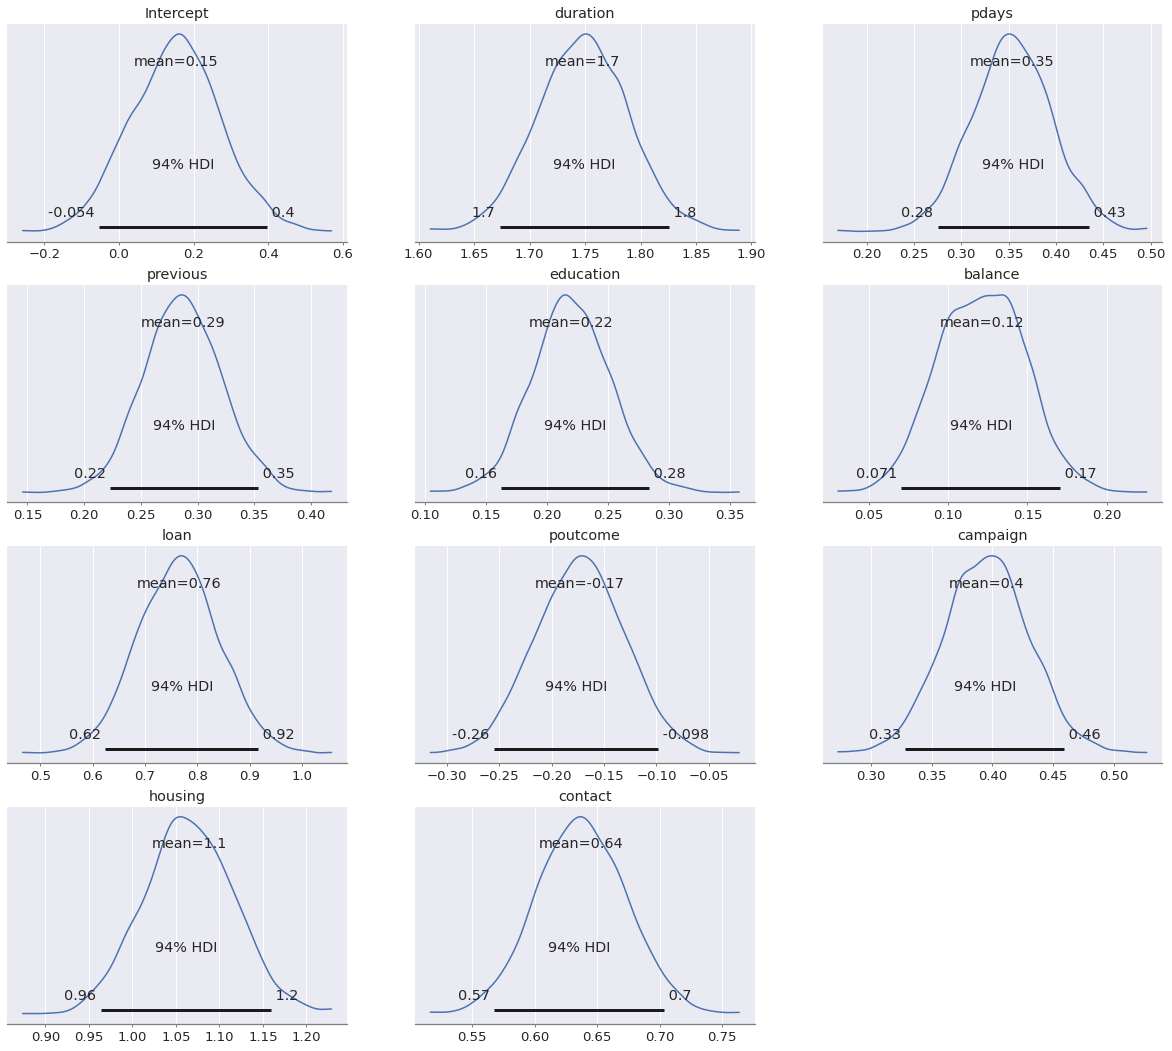

In [81]:
pm.plot_posterior(trace_NUTS)

**Posterior Predictive Checks**

PPCs are very useful for examining how well a model fits the data. They do so by generating data from the model using parameters from draws from the posterior. We use the function pm.sample_ppc for this purpose and obtain n samples for each observation (the GLM module automatically names the outcome y):

In [83]:
ppc = pm.sample_posterior_predictive(trace_NUTS, samples=500, model=logistic_model)

In [84]:
ppc['y'].shape

(500, 11162)

**Check AUC Score**

In [85]:
y_score = np.mean(ppc['y'], axis=0)

In [86]:
pred_scores = dict(y_true=data.deposit,y_score=y_score)
roc_auc_score(**pred_scores)

0.8673164608528467

## Prediction

Predictions use theano’s shared variables to replace the training data with test data before running posterior predictive checks. To facilitate visualization, we create the train and test datasets, and convert the former to a shared variable. Note that we need to use numpy arrays and provide a list of column labels:

In [87]:
#Train-test split

X = data.drop('deposit', axis=1)
y = data.deposit
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
labels = X_train.columns

In [88]:
#Create shared theano variable

X_shared = theano.shared(X_train.values)

In [89]:
# Define logistic model

with pm.Model() as logistic_model_pred:
    pm.glm.GLM(x=X_shared, labels=labels,
               y=y_train, family=pm.glm.families.Binomial())

**Run NUTS sampler**

In [91]:
with logistic_model_pred:
    pred_trace = pm.sample(draws=1000, 
                           tune=1000,
                           chains=2,
                           cores=2,
                           init='adapt_diag')

**Replace shared variable with test set**

We then run the sampler as before, and apply the pm.sample_ppc function to the resulting trace after replacing the train with test data:

In [92]:
X_shared.set_value(X_test)

In [94]:
ppc = pm.sample_posterior_predictive(pred_trace,
                    model=logistic_model_pred,
                    samples=100)

**AUC Score**

In [95]:
y_score = np.mean(ppc['y'], axis=0)
roc_auc_score(y_score=np.mean(ppc['y'], axis=0), 
              y_true=y_test)

0.8631267673106015

In [96]:
pred_scores = dict(y_true=y_test, y_score=y_score)
cols = ['False Positive Rate', 'True Positive Rate', 'threshold']
roc = pd.DataFrame(dict(zip(cols, roc_curve(**pred_scores))))

**Precision and Recall Curve**

In [97]:
precision, recall, ts = precision_recall_curve(y_true=y_test, probas_pred=y_score)
pr_curve = pd.DataFrame({'Precision': precision, 'Recall': recall})

**F1 - Score**

In [98]:
f1 = pd.Series({t: f1_score(y_true=y_test, y_pred=y_score>t) for t in ts})
best_threshold = f1.idxmax()

**Plotting Results of Evaluation**

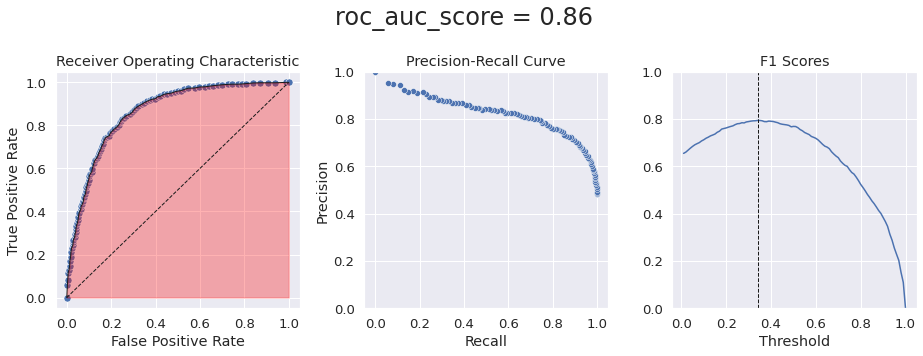

In [101]:
fig, axes = plt.subplots(ncols=3, figsize=(13, 5))

ax = sns.scatterplot(x='False Positive Rate', y='True Positive Rate', data=roc, s=50, legend=False, ax=axes[0])
axes[0].plot('False Positive Rate', 'True Positive Rate', data=roc, lw=1, color='k')
axes[0].plot(np.linspace(0,1,100), np.linspace(0,1,100), color='k', ls='--', lw=1)
axes[0].fill_between(y1=roc['True Positive Rate'], x=roc['False Positive Rate'], alpha=.3, color='red')
axes[0].set_title('Receiver Operating Characteristic')


sns.scatterplot(x='Recall', y='Precision', data=pr_curve, ax=axes[1])
axes[1].set_ylim(0,1)
axes[1].set_title('Precision-Recall Curve')


f1.plot(ax=axes[2], title='F1 Scores', ylim=(0,1))
axes[2].set_xlabel('Threshold')
axes[2].axvline(best_threshold, lw=1, ls='--', color='k')
#axes[2].text(text=f'Max F1 @ {best_threshold:.2f}', x=.60, y=.95, s=5)
fig.suptitle(f'roc_auc_score = {round(roc_auc_score(**pred_scores),2)}', fontsize=24)
fig.tight_layout()
plt.subplots_adjust(top=.8)
plt.show()

# Conclusion

We can observe from our activity that MCMC with nuts sampling provides a marginally better accuracy for prediction.

* ML Random Forest Algo AUC = 0.842
* MCMC (with NUTS) AUC = 0.863









+ Even though the MCMC method is theoritcally simpler but it requires much more time to run and much more data to give more accurate results.
+ On the face of it MCMC seems to give only a marginally better result. Had we had more data and thus more samples, the accuracy could have been improved further.
    * However for ML algos 0.842 seems to be the highest AUC given that we tried multiple techniques (With FS and CV)
    